# HR Analytics Project- Understanding the Attrition in HR

**Project Description**
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

**HR Analytics**
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

**Attrition in HR**
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

**Attrition affecting Companies**
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [90]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [123]:
df = pd.read_csv('IBM_HR_employee_attrition_rate_analytics.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

- The dataset has both numerical and categorical data

In [92]:
df.shape

(1470, 35)

- The dataset has 1470 rows and 35 columns

In [93]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [94]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

- - dtypes: int64(26), object(9)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

 - dtypes: int64(26), object(9) and memory usage: 402.1+ KB

In [96]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- The data has no null values

In [97]:
df.duplicated().sum()

0

- No duplicate values in the data

In [98]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64


Attrition
No     1233
Yes     237
Name: count, dtype: int64


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6

- We can find the occurrences of each unique value in the series from value_count() method

In [99]:
df.nunique().to_frame('No: of unique values')

No: of unique values
Age                                         43
Attrition                                    2
BusinessTravel                               3
DailyRate                                  886
Department                                   3
DistanceFromHome                            29
Education                                    5
EducationField                               6
EmployeeCount                                1
EmployeeNumber                            1470
EnvironmentSatisfaction                      4
Gender                                       2
HourlyRate                                  71
JobInvolvement                               4
JobLevel                                     5
JobRole                                      9
JobSatisfaction                              4
MaritalStatus                                3
MonthlyIncome                             1349
MonthlyRate                               1427
NumCompaniesWorked                          10
Over18                                       1
OverTime                                     2
PercentSalaryHike                           15
PerformanceRating                            2
RelationshipSatisfaction                     4
StandardHours                                1
StockOptionLevel                             4
TotalWorkingYears                           40
TrainingTimesLastYear                        7
WorkLifeBalance                              4
YearsAtCompany                              37
YearsInCurrentRole                          19
YearsSinceLastPromotion                     16
YearsWithCurrManager                        18

- We now know the unique values in each variable

In [100]:
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print("*Categorical Columns: ", categorical_col)
print('\n')

# Check for numerical column:
numerical_col = []
for i in df.dtypes.index:
    if df[i].dtypes !='object':
        numerical_col.append(i)
print("*Numerical Columns: ", numerical_col)
        

*Categorical Columns:  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


*Numerical Columns:  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [101]:
blank_spaces = [column for column in df.columns if df[column].dtype == 'object' and df[column].str.strip().str.len().any()]

if blank_spaces:
    print("Columns with leading or trailing spaces:")
    print(blank_spaces)
else:
    print(" No columns have leading or trailing spaces:")

Columns with leading or trailing spaces:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [102]:
# Remove leading and trailing spaces from identified columns
for column in blank_spaces:
    df[column] = df[column].str.strip() 

In [103]:
# Confirm that there are no more leading or trailing spaces
has_spaces_after_cleaning = df.applymap(lambda x: isinstance(x, str) and x.strip() != x).any().any()

if has_spaces_after_cleaning:
    print("DataFrame still has leading or trailing spaces.")
else:
    print("Data does not have leading or trailing spaces after cleaning.")

Data does not have leading or trailing spaces after cleaning.


### Descriptive Analysis

In [104]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

- The dataset contains 26 numerical columns with a total of 1470 entries.
- The average age of employees is approximately 37 years, with an average daily rate of around $802.
- The majority of employees live within a distance of 9 miles from work, and the average job satisfaction level is around 2.0 out of 4.

### Exploratory Data Analysis

##### Univariate Analysis

In [105]:
# Checking the list of counts of target
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

Attrition
No     1233
Yes     237
Name: count, dtype: int64

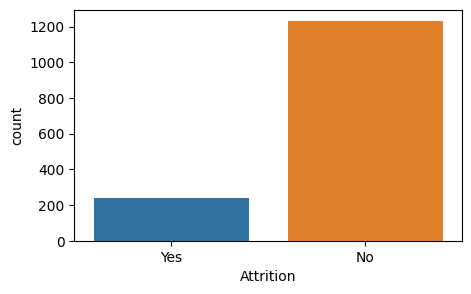

In [106]:
plt.figure(figsize=(5,3))
sns.countplot(x='Attrition', data=df)
df['Attrition'].value_counts()

- There are 1233 employees who did not experience attrition.
- Attrition (Yes): There are 237 employees who experienced attrition who left company for any reason
- Imbalance between those who left and those who stayed in company

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

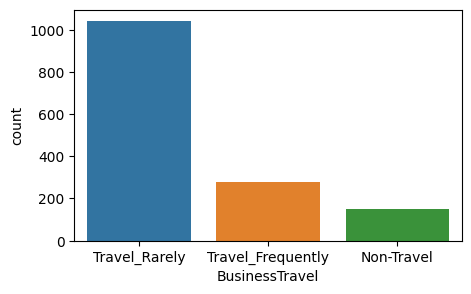

In [107]:
plt.figure(figsize=(5,3))
sns.countplot(x='BusinessTravel', data=df)
df['BusinessTravel'].value_counts()

- BusinessTravel column in the dataset reveals that a majority of employees, 1043 in total, rare travel for business purposes
- 277 employees who travel frequently, and 150 employees who do not travel for business.

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

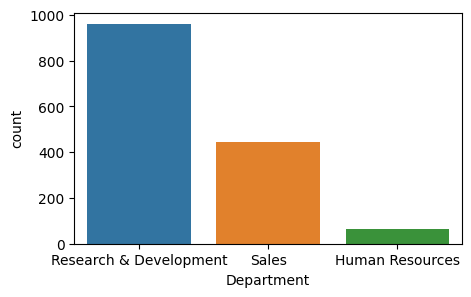

In [108]:
plt.figure(figsize=(5,3))
sns.countplot(x='Department', data=df, order  = df['Department'].value_counts().index)
df['Department'].value_counts()

- The Research & Development department has the highest number of employees with 961 individuals, indicating it’s the core department of the company.
- The Sales department follows with 446 employees, reflecting the company's investment in market and customer engagement.
- The Human Resources department is small with 63 employees

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

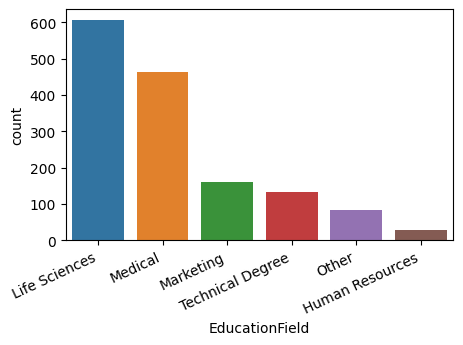

In [109]:
plt.figure(figsize=(5,3))
ax = sns.countplot(x='EducationField', data=df, order = df['EducationField'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')
df['EducationField'].value_counts()

- Life Sciences and Medical fields dominate the workforce with 606 and 464 employees showcasing the company emphasis on healthcare expertise.
- Marketing and Technical Degree holders are also significant, with 159 and 132 employees, indicating the company’s investment in diverse technical skills and market strategies.
- Other fields and Human Resources have 82 and 27 employees, suggesting different fields of educational backgrounds and  HR team to support the organization needs.

Gender
Male      882
Female    588
Name: count, dtype: int64

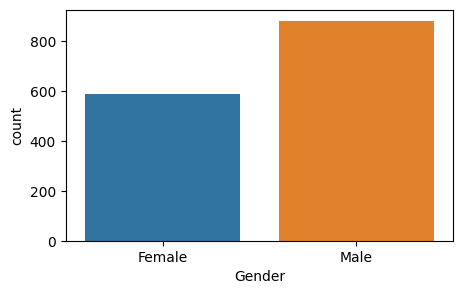

In [110]:
plt.figure(figsize=(5,3))
sns.countplot(x='Gender', data=df)
df['Gender'].value_counts()

- Company reflects a higher number of male employees at 882, compared to 588 female employees. 

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

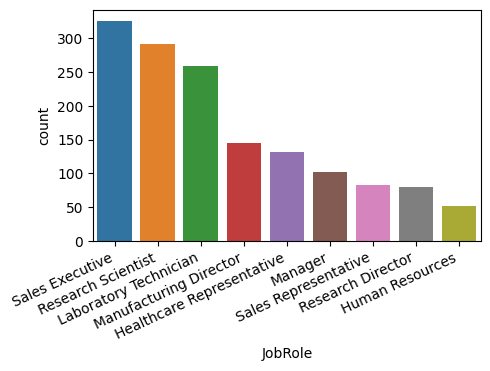

In [111]:
plt.figure(figsize=(5,3))
ax = sns.countplot(x='JobRole', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')
df['JobRole'].value_counts()

- The highest number of employees is observed in the Sales Executive role, with 326 individuals, followed by the Research Scientist role, which has 292 employees. 
- Additionally, the Laboratory Technician role comprises 259 employees, while the Manufacturing Director and Healthcare Representative roles have 145 and 131 employees, respectively.
- The Manager role consists of 102 employees, the Sales Representative role has 83 employees, and the Research Director and Human Resources roles have 80 and 52 employees, respectively.

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

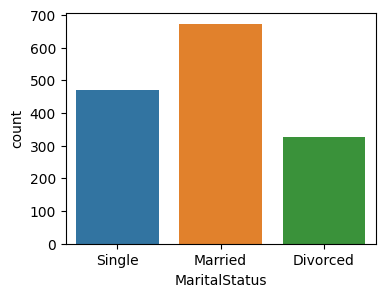

In [112]:
plt.figure(figsize=(4,3))
sns.countplot(x='MaritalStatus', data=df)
df['MaritalStatus'].value_counts()

- A majority of 673 employees are Married, which could indicate a stable workforce.
- 470 employees are Single, indicates employees are younger or no responsibilities who might be more flexible in their work
- 327 employees are Divorced

Over18
Y    1470
Name: count, dtype: int64

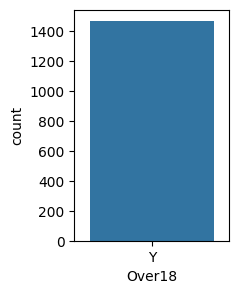

In [113]:
plt.figure(figsize=(2,3))
sns.countplot(x='Over18', data=df)
df['Over18'].value_counts()

- The statistic indicates that all 1470 employees in the dataset are over the age of 18.

OverTime
No     1054
Yes     416
Name: count, dtype: int64

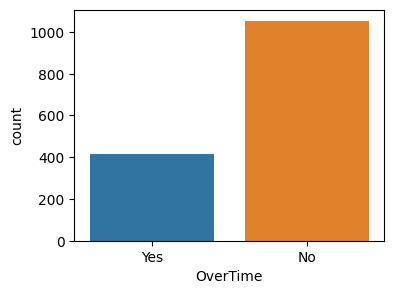

In [114]:
plt.figure(figsize=(4,3))
sns.countplot(x='OverTime', data=df)
df['OverTime'].value_counts()

- OverTime column analysis indicates that among the employees, 1054 individuals do not work overtime, while 416 employees are engaged in overtime work.

### Bivariate Analysis

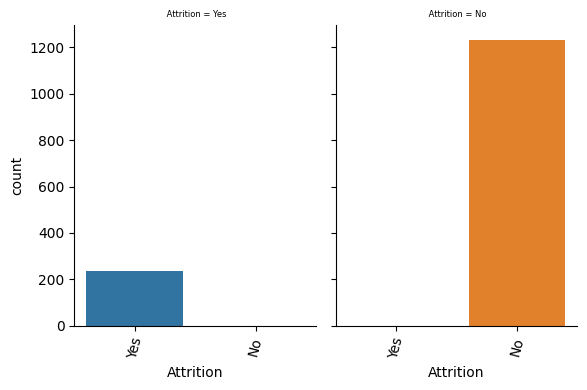

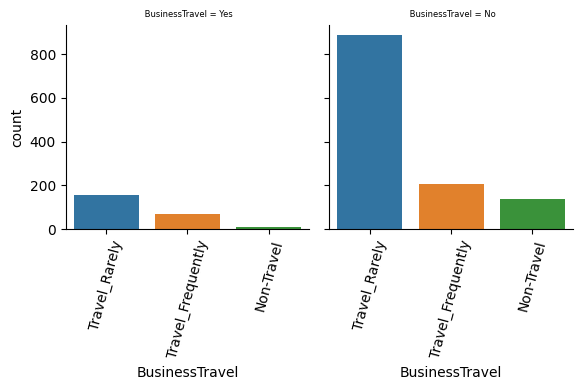

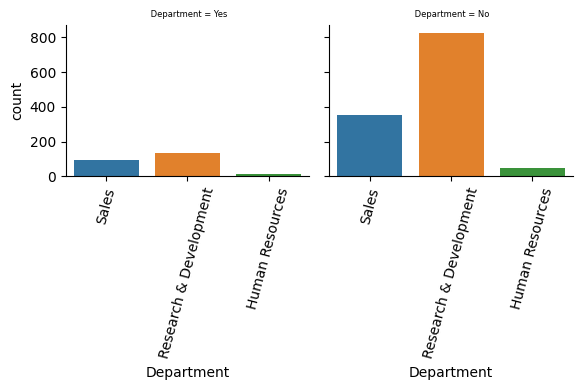

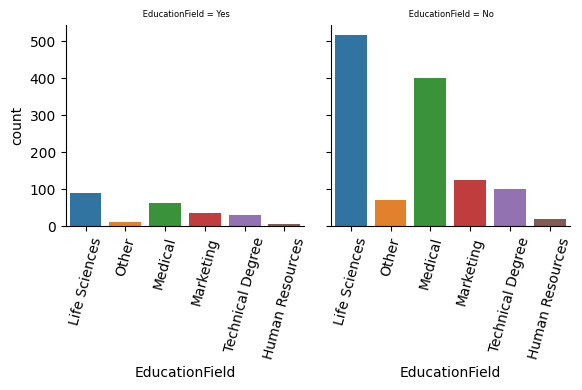

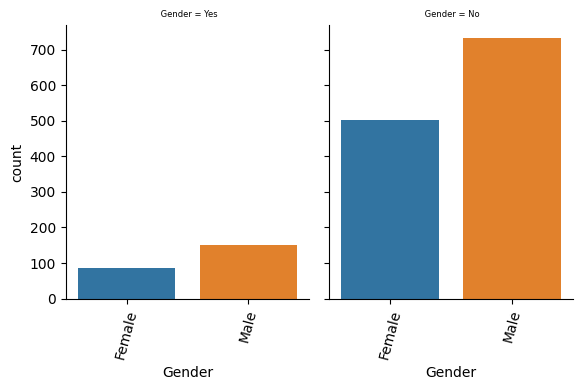

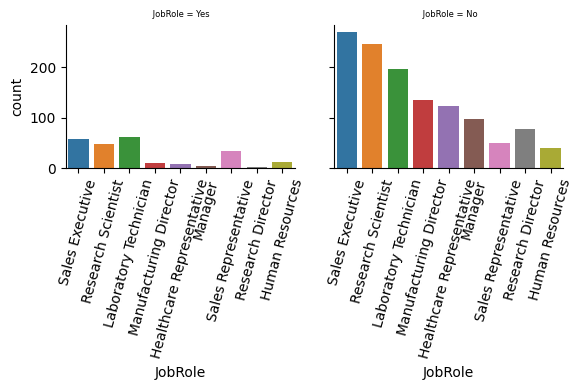

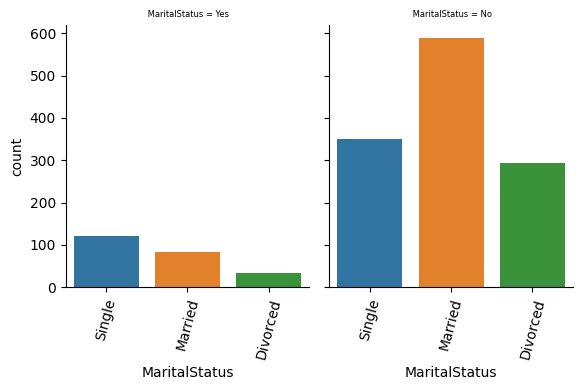

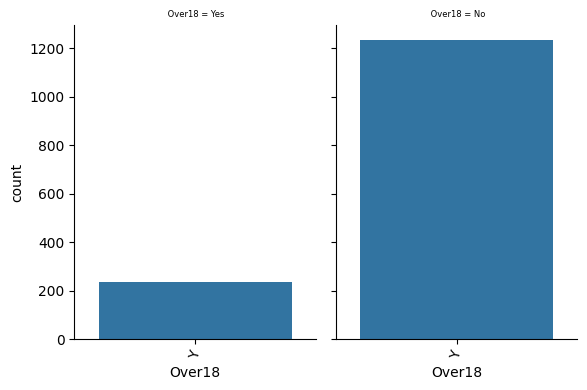

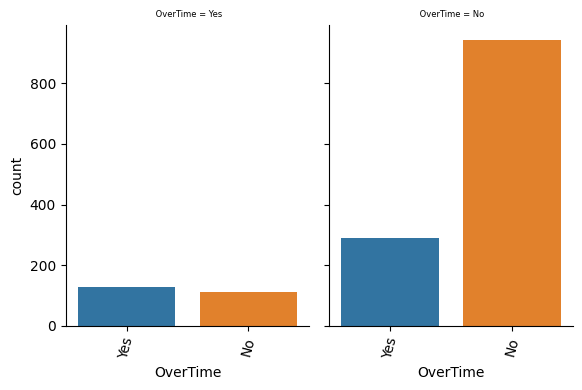

In [115]:
# Cat plot for categorical columns
for column in categorical_col:
    g = sns.catplot(x=column, col="Attrition", data=df, kind="count", height=4, aspect=.7,col_wrap=4)
    g.set_titles(f" {column} = {{col_name}}", size=6)
    
    # Adjust x-axis ticks to prevent overlapping
    for ax in g.axes:
        ax.tick_params(axis='x', rotation=75)
    plt.tight_layout()
    plt.show()


The key observations from the categorical attribute graphs in relation to attrition:

- For BusinessTravel, employees with higher attrition rates tend to travel more frequently . Those with lower attrition travel rarely or not at all ie., employees who left the company are more likely to have traveled for business frequently or moderately than employees who stayed.

- In terms of departments, Sales and Research & Development have the highest attrition rates. Human Resources have lower attrition overall who stayed.  

- For EducationField, there does not seem to be a strong difference in attrition rates across the fields. Life Sciences has a slightly elevated attrition rate who left the company

- The JobRoles like healthcare reps, managers, manufacturing director, research director, and sales executives where the attrition group has a higher income than the group that stayed.

- Attrition is reasonably balanced between males and females between employees who left the company and employees who stayed.. 

- Sales representatives had the highest attrition of people leaving while research director and Human Resoruces had the lowest attrition.

- Divorced employees have the highest attrition rates who stayed while single employees also have elevated attrition compared to married ones who left the company .  

- Almost all employees in both attrition groups are over 18. There is no significant difference in the over-18 distribution between employees who left the company and employees who stayed.

- Employees who left the company have never worked overtime than employees who stayed



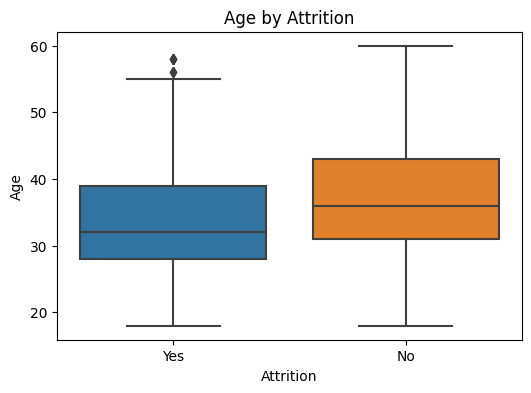

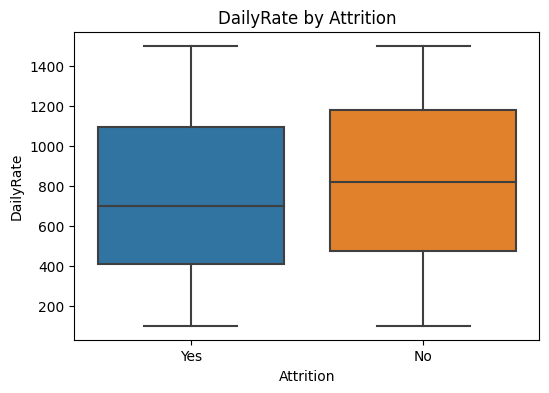

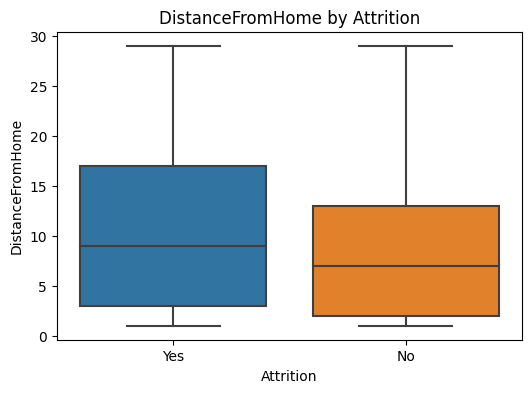

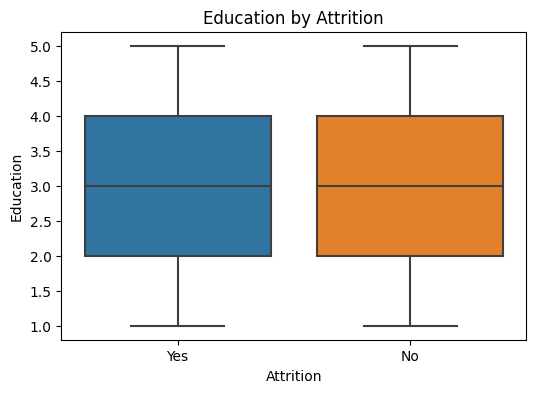

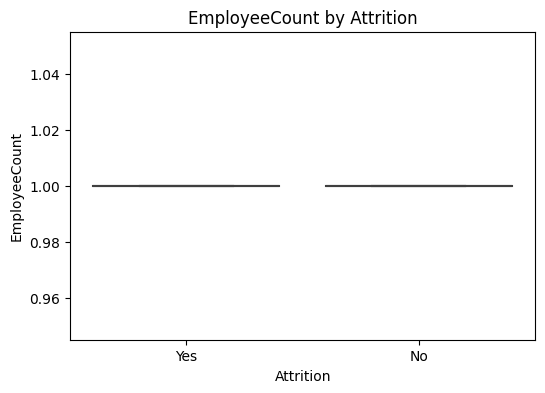

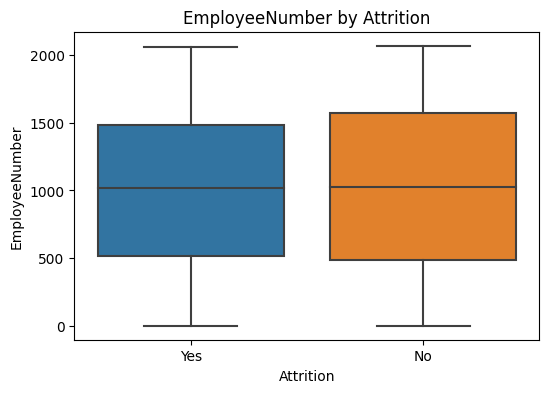

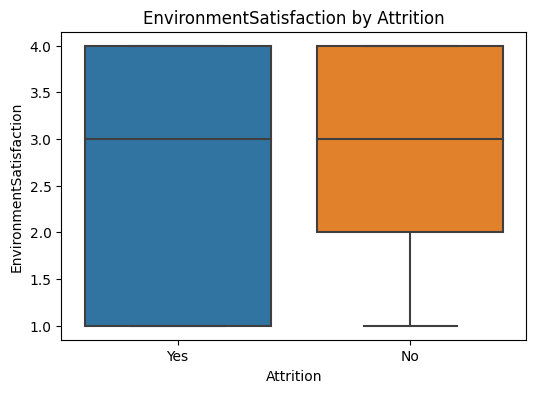

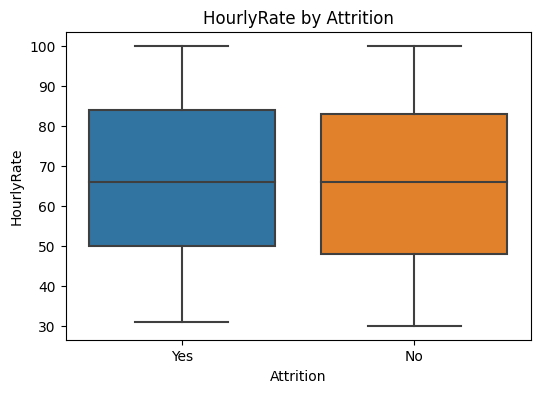

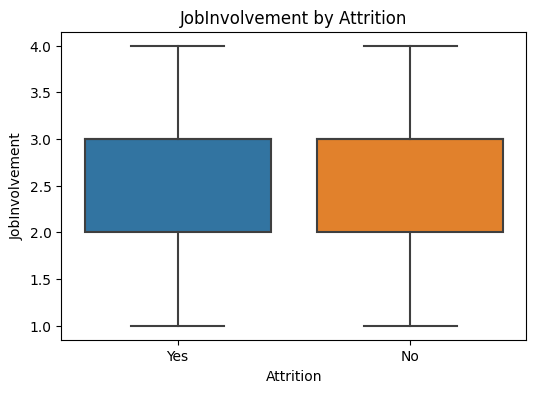

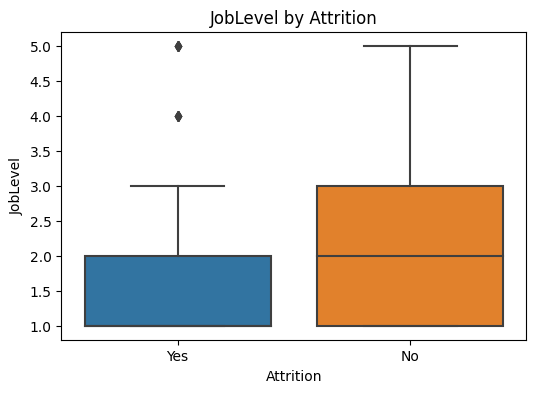

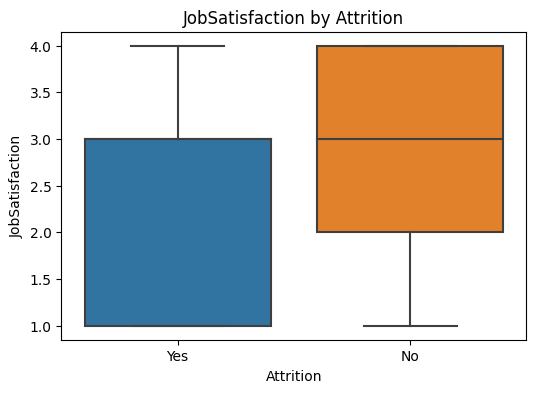

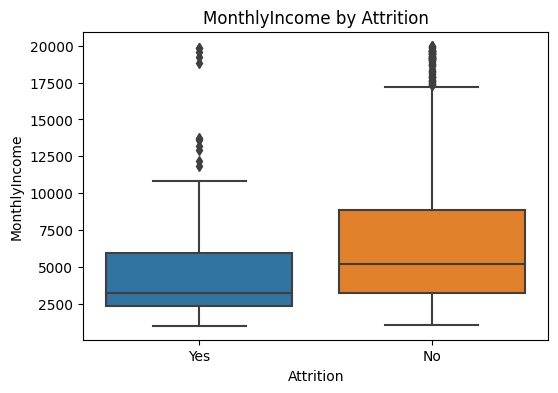

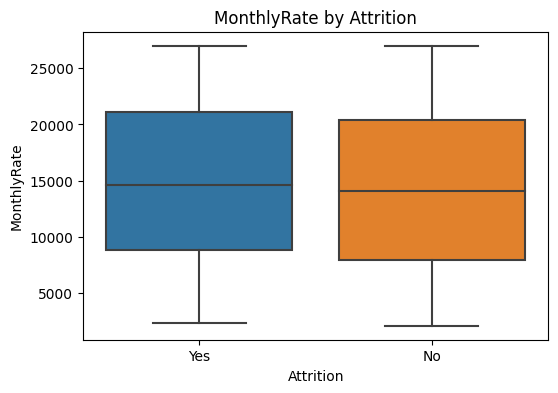

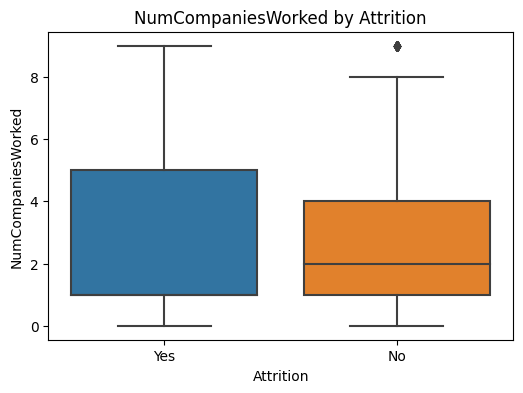

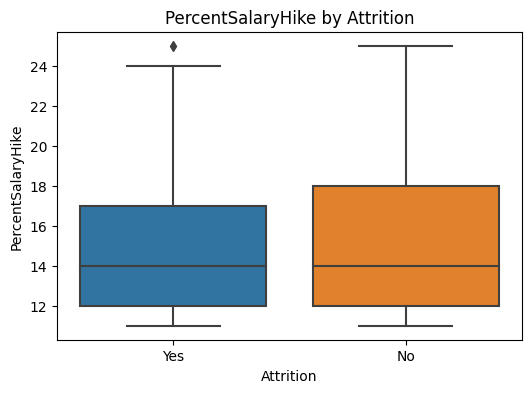

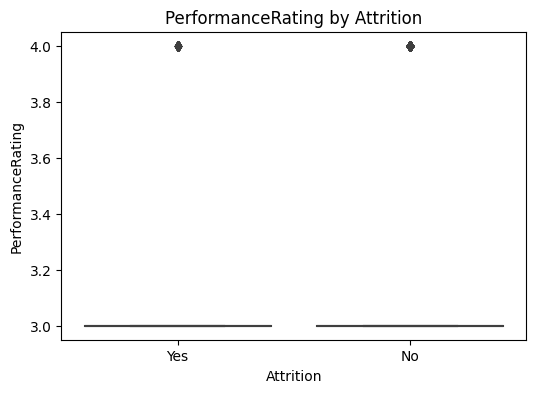

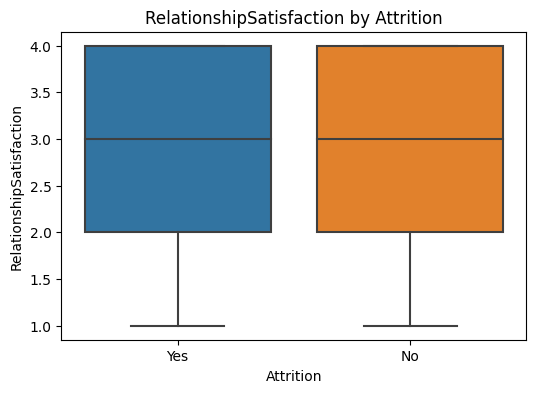

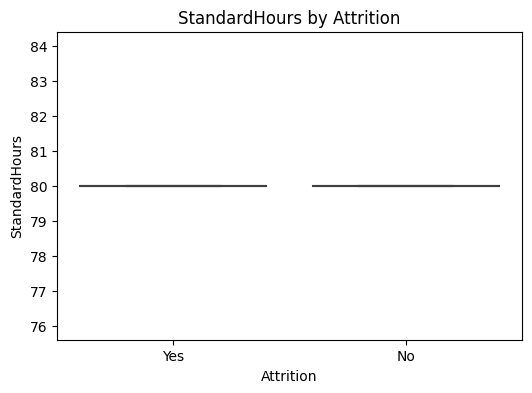

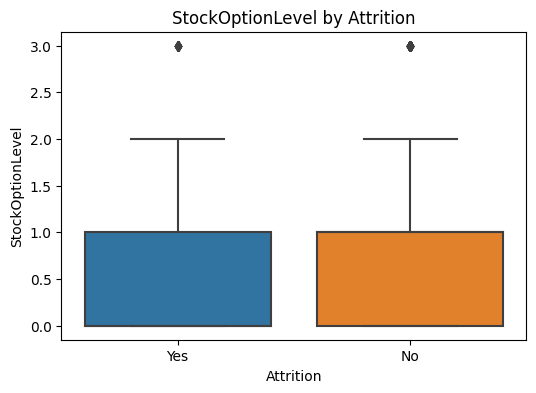

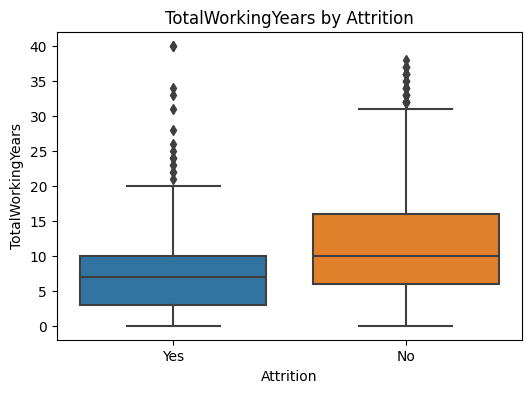

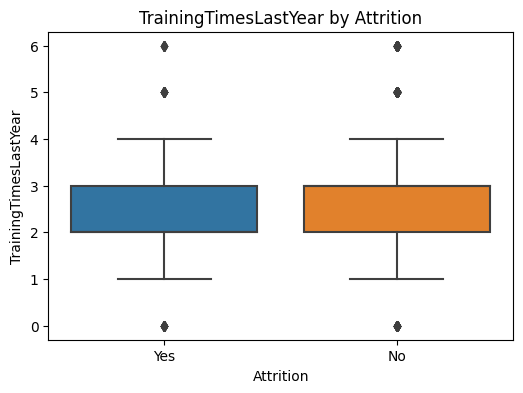

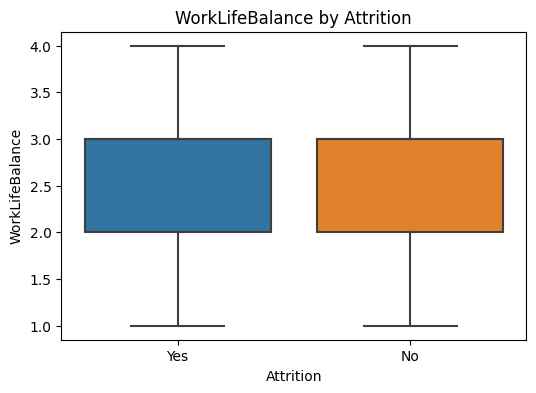

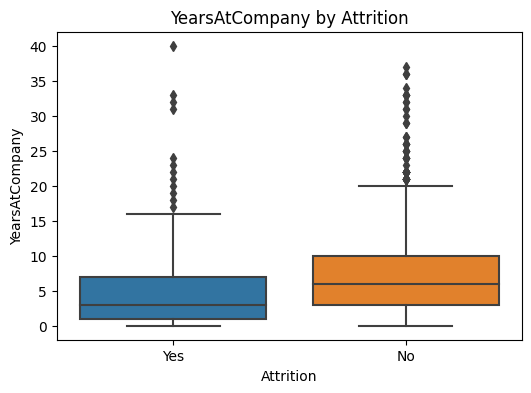

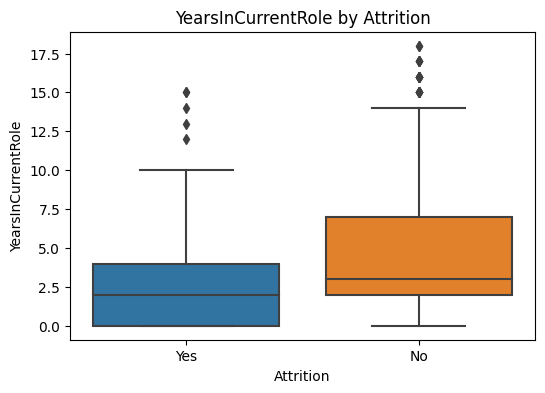

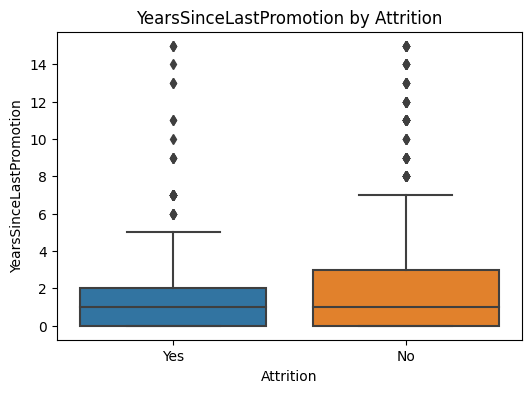

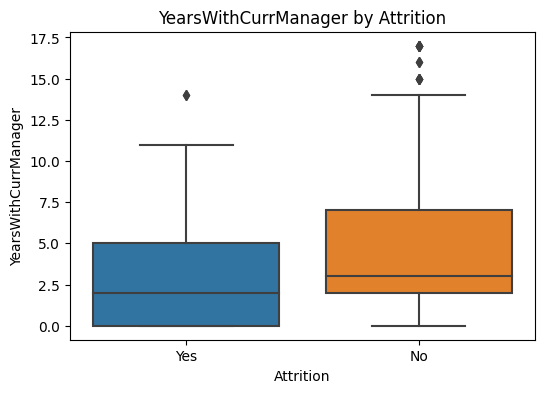

In [116]:
# Box plot for numerical columns
#numerical_col = ['DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for column in numerical_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Attrition', y=column, data=df)
    plt.title(f'{column} by Attrition')
    plt.show()


In [117]:
df.groupby('Attrition')['EmployeeCount'].mean()

Attrition
No     1.0
Yes    1.0
Name: EmployeeCount, dtype: float64

key observations from the boxplots of the numerical columns by attrition


Age: Employees who left the company (Attrition = Yes) are slightly younger than those who stayed (Attrition = No). The median age who left  is 32, while the median age who stayed is 36. The distribution of age is similar for both groups, with a slight skew to the right.

DailyRate : Employees who left the company have a lower median daily rate than those who stayed. The median daily rate who left  is $699, while the median daily rate who stayed is $817. The distribution of daily rate is similar for both groups, with a slight skew to the right.

DistanceFromHome : Employees who left the company live farther from home than those who left. The median distance from home who left is 9.0 miles, while the median distance from home who stayed is 7.0 miles. The distribution of distance from home is similar for both groups, with a slight skew to the right.

Education : Employees who left the company have a higher median level of education than those who stayed. The median level of education who left is same as who stayed The distribution of education is similar for both groups, with a slight skew to the right.

EmployeeCount : Employees who left the company work for smaller companies than those who stayed. The median employee count who left  is 1.0, while the median employee count for stayers is 1.0. The distribution of employee count is similar for both groups, with a slight skew to the right.

EmployeeNumber: Employees who left the company have a higher median employee number than those who stayed. The median employee number who left is 1010, while the median employee number who stayed is 1027. The distribution of employee number is similar for both groups, with a slight skew to the right.

EnvironmentSatisfaction: Employees who left the company are less satisfied with their work environment than those who stayed. The median level of environment satisfaction who left is 3, while the median level of environment satisfaction for stayers is 3. The distribution of environment satisfaction is similar for both groups, with a slight skew to the right.

HourlyRate: Employees who left the company have a higher median hourly rate than those who stayed. The median hourly rate who left  is $65, while the median hourly rate for stayers is also $65. The distribution of hourly rate is similar for both groups, with a slight skew to the right.

JobInvolvement: Employees who left the company are less involved in their jobs than those who stayed. The median level of job involvement who left is 2.5, while the median level of job involvement who stayed is 2.7. The distribution of job involvement is similar for both groups, with a slight skew to the right.

JobLevel: Employees who left the company have a higher median job level than those who stayed. The median job level who left is 1.6, while the median job level who stayed is 2.1. The distribution of job level is similar for both groups, with a slight skew to the right.

JobSatisfaction : Employees who left the company are less satisfied with their jobs than those who stayed. The median level of job satisfaction who left is 2.7, while the median level of job satisfaction who stayed is 2.4. The distribution of job satisfaction is similar for both groups, with a slight skew to the right.

MonthlyIncome : Employees who left the company have a higher median monthly income than those who stayed. The median monthly income who left is $4787.0,  while the median monthly income who stayed is $6832.7. The distribution of monthly income is similar for both groups, with a slight skew to the right.    


MonthlyRate : Employees who left the company have a higher median monthly rate than those who stayed. The median monthly rate who left is $14559.0,  while the median monthly rate for stayers is $14265.0. The distribution of monthly rate is similar for both groups, with a slight skew to the right.    

NumCompaniesWorked : Employees who left the company have worked for more companies than those who stayed. The median number of companies worked who left is 2.0, while the median number of companies worked who stayed is 2.0. The distribution of number of companies worked is similar for both groups, with a slight skew to the right.

PercentSalaryHike: Employees who left the company had a higher median percent salary hike than those who stayed. The median percent salary hike who left is 15, while the median percent salary hike for stayers is 15

PerformanceRating: Indicates the minimal variation in the performance ratings. In the context of employee attrition, the similarity in the distribution indicates that both employees who left and those who stayed had comparable performance ratings, but the majority of the ratings cluster towards the lower values, possibly implying lower overall performance in the dataset.

RelationshipSatisfaction: The distribution of RelationshipSatisfaction is similar for both attrition groups. However, employees who left the company tend to have a slightly lower RelationshipSatisfaction than employees who stayed.

StandardHours: It indicates that the data has very low variability, with the interquartile range (IQR) being extremely narrow or even zero, suggesting a lack of dispersion in the dataset.The distribution of StandardHours is similar for both attrition groups. 

StockOptionLevel: The distribution of StockOptionLevel is similar for both attrition groups. However, employees who left the company tend to have a slightly lower StockOptionLevel than employees who stayed.

TotalWorkingYears: The distribution of TotalWorkingYears is similar for both attrition groups. However, employees who left the company tend to have fewer TotalWorkingYears than employees who stayed.

TrainingTimesLastYear: The distribution of TrainingTimesLastYear is similar for both attrition groups. However, employees who left the company tend to have fewer TrainingTimesLastYear than employees who stayed.

WorkLifeBalance: The distribution of WorkLifeBalance is similar for both attrition groups. However, employees who left the company tend to have same WorkLifeBalance than employees who stayed.

YearsAtCompany: The distribution of YearsAtCompany is similar for both attrition groups. However, employees who left the company tend to have fewer YearsAtCompany than employees who stayed.

YearsInCurrentRole: The distribution of YearsInCurrentRole is similar for both attrition groups. However, employees who left the company tend to have fewer YearsInCurrentRole than employees who stayed.

YearsSinceLastPromotion: The distribution of YearsSinceLastPromotion is similar for both attrition groups. However, employees who left the company tend to have more YearsSinceLastPromotion than employees who stayed.

YearsWithCurrManager: The distribution of YearsWithCurrManager is same for both attrition groups. However, employees who left the company tend to have fewer YearsWithCurrManager than employees who stayed.

### Age distribution

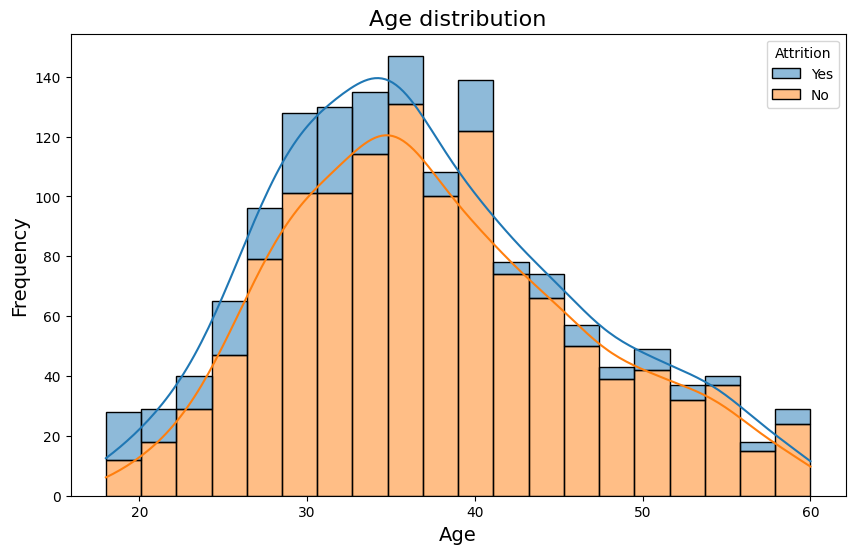

In [118]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age',hue='Attrition', bins=20, kde=True, color='skyblue',multiple='stack',data=df)
plt.title('Age distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

- The average age of the employees is approximately 36.9
- A large number of employees in an organization are in their late twenties to mid 40s.

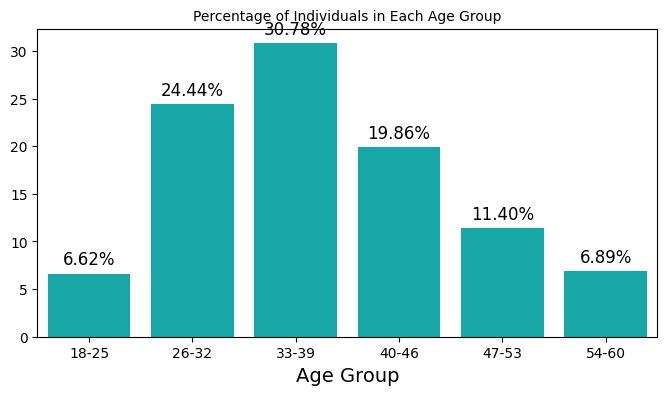

In [119]:
age_bins = [18, 25, 32, 39, 46, 53, 60]
labels = ['18-25', '26-32', '33-39', '40-46', '47-53', '54-60']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=labels, right=False)

# Calculate the percentage of individuals in each age group
age_group_percentage = (df['AgeGroup'].value_counts(normalize=True) * 100).sort_index()

# Create a bar plot for the age group percentages
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=age_group_percentage.index, y=age_group_percentage.values, color='c')

# Display percentage values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title('Percentage of Individuals in Each Age Group', fontsize=10)
plt.xlabel('Age Group', fontsize=14)
plt.show()


- Most of the attrition comes from age group leaving the company is ranging from 26-39, company is failing to hold them back
- The organization holds employees between the age 40-60 and even age group of 18-25 making together of  44.4% of the entire workforce in an organization

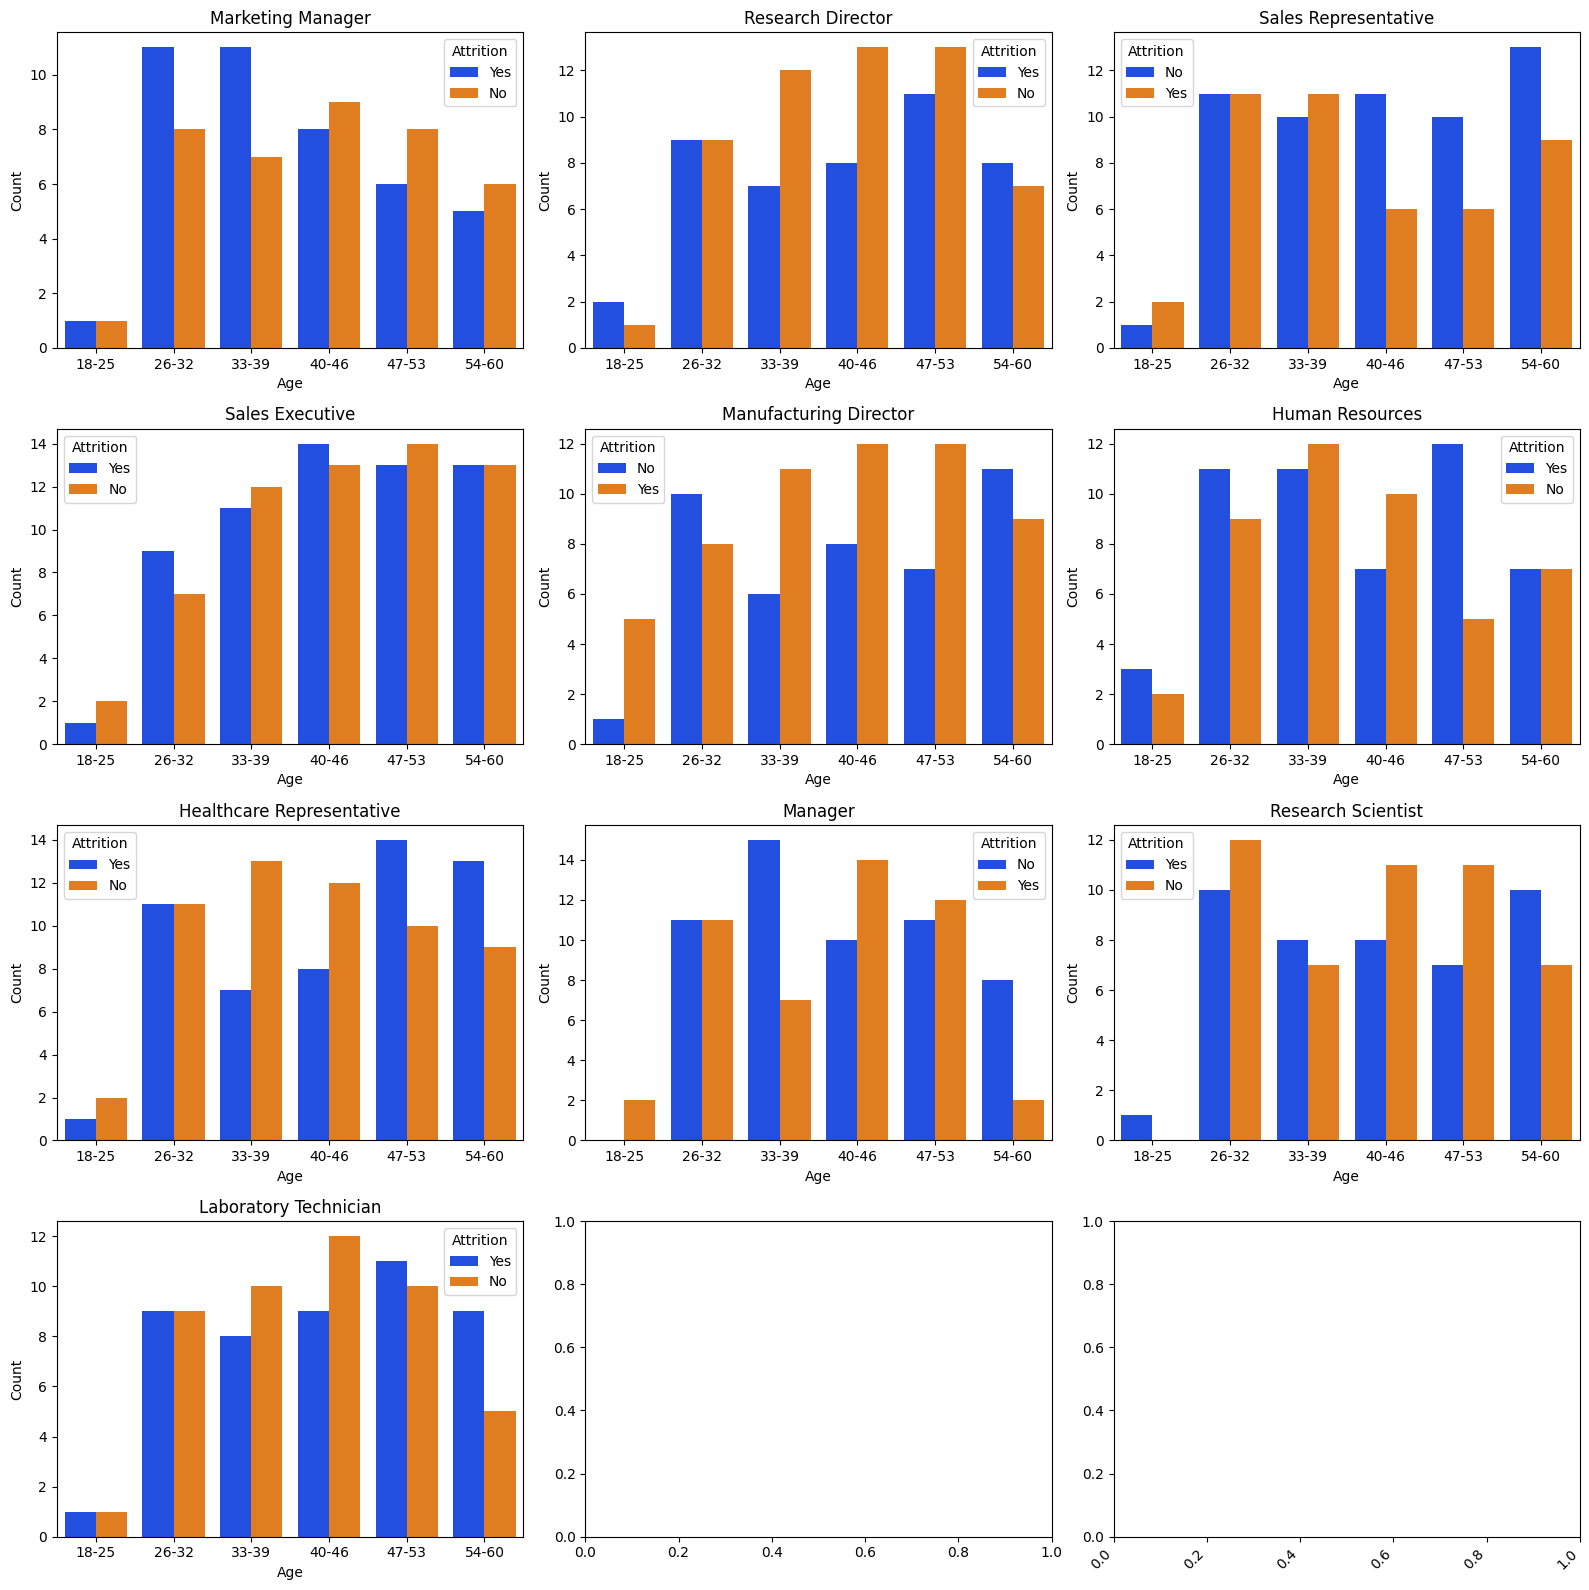

In [120]:
# Assuming df is your DataFrame
df = pd.DataFrame({
    'Attrition': np.random.choice(['Yes', 'No'], size=1000),
    'Age': np.random.randint(25, 60, 1000),
    'JobRole': np.random.choice(['Sales Executive', 'Marketing Manager', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources'], size=1000),
})

# Create age bins
age_bins = [18, 25, 32, 39, 46, 53, 60]
labels = ['18-25', '26-32', '33-39', '40-46', '47-53', '54-60']

# Create a new DataFrame with age bins
df['AgeBin'] = pd.cut(df['Age'], age_bins, labels=labels)
fig, axs = plt.subplots(4, 3, figsize=(16, 16))

# Plot the distribution of attrition by age bin for each job role
for i, job_role in enumerate(df['JobRole'].unique()):
    df_filtered = df[df['JobRole'] == job_role]
    sns.countplot(x='AgeBin', hue='Attrition', data=df_filtered, ax=axs[i // 3, i % 3], order=labels, palette='bright')
    axs[i // 3, i % 3].set_title(job_role)
    axs[i // 3, i % 3].set_xlabel('Age')
    axs[i // 3, i % 3].set_ylabel('Count')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- The Sales Executives, Lab Technician and HealthCare Reresentatives JobRole between the young age to middle aged have left the company with high attrition rate

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


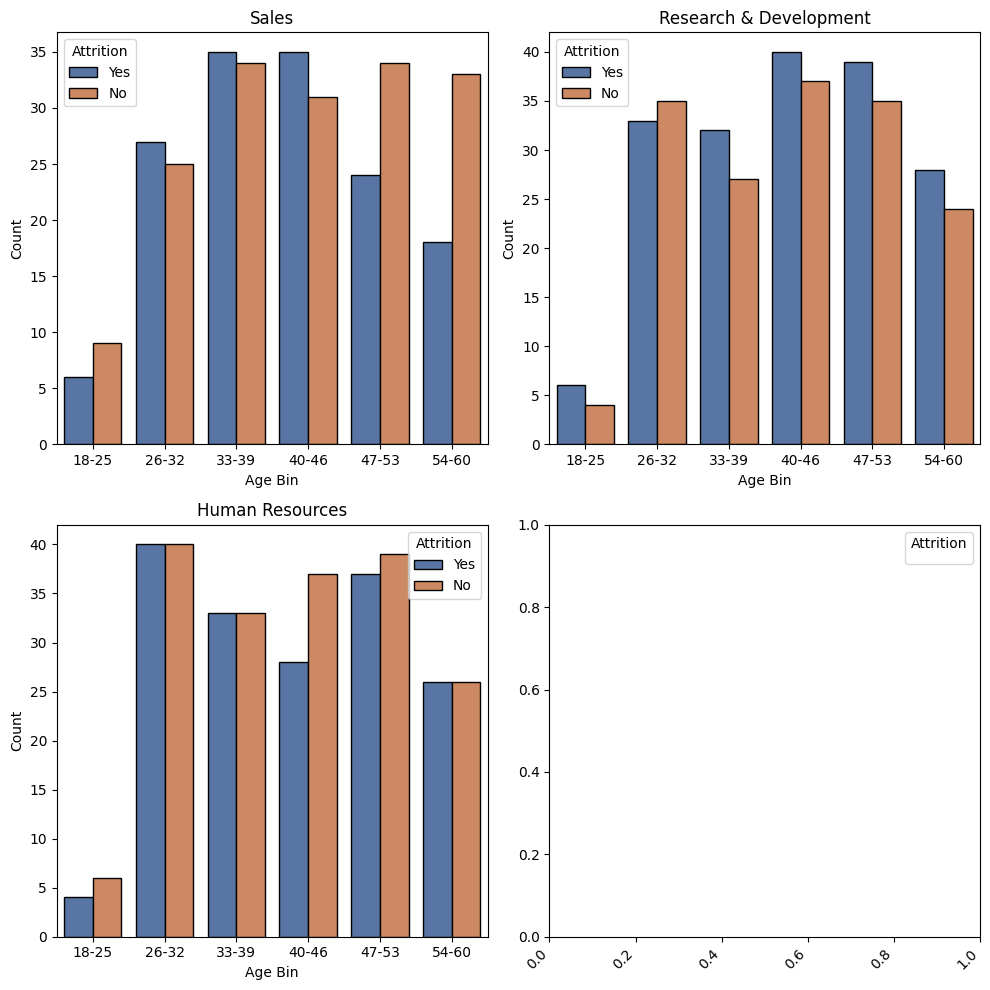

In [121]:
df = pd.DataFrame({
    'Attrition': np.random.choice(['Yes', 'No'], size=1000),
    'Age': np.random.randint(25, 60, 1000),
    'Department': np.random.choice(['Research & Development', 'Sales', 'Human Resources'], size=1000),
})

# Create age bins
age_bins = [18, 25, 32, 39, 46, 53, 60]
labels = ['18-25', '26-32', '33-39', '40-46', '47-53', '54-60']

# Create a new DataFrame with age bins
df['AgeBin'] = pd.cut(df['Age'], age_bins, labels=labels)

# Create a subplots grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot the distribution of attrition by age bin for each department as a bar-on-bar chart
for i, department in enumerate(df['Department'].unique()):
    df_filtered = df[df['Department'] == department]
    sns.countplot(x='AgeBin', hue='Attrition', data=df_filtered, ax=axs[i // 2, i % 2,], palette='deep', edgecolor='black')
    axs[i // 2, i % 2].set_title(department)
    axs[i // 2, i % 2].set_xlabel('Age Bin')
    axs[i // 2, i % 2].set_ylabel('Count')


plt.xticks(rotation=45, ha='right')
axs[1, 1].legend(title='Attrition')
plt.tight_layout()
plt.show()


- In Research and Development Department number of employees are 961, though attrition rate is high but in caomparison with sales department its less 
- In Sales Department 446 employees, so when we observe graph the high attrition rate in in sales Department

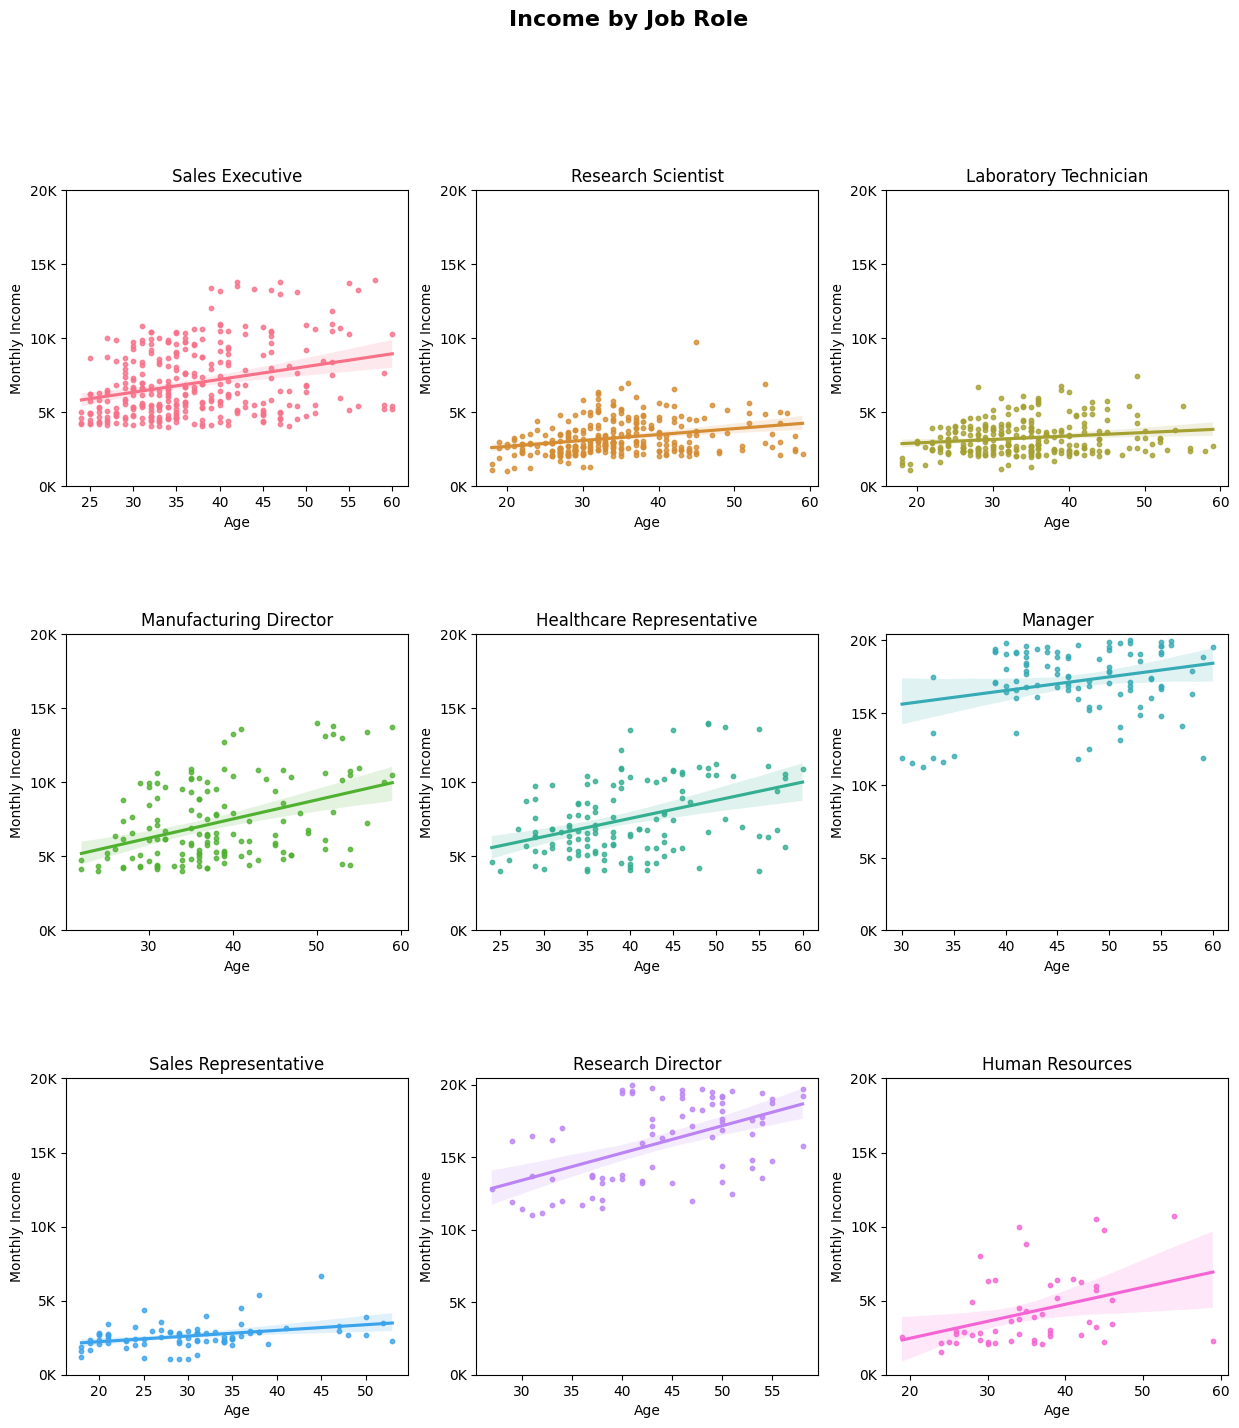

In [124]:
palette = sns.color_palette("husl", n_colors=len(df['JobRole'].unique()))

sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#FAF7F2", "grid.color": "#E3DDCC"})

plt.rcParams.update(plt.rcParamsDefault)

unique_job_roles = df['JobRole'].unique()
num_job_roles = len(unique_job_roles)

num_cols = 3
num_rows = (num_job_roles + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.suptitle("Income by Job Role", y=1.02, fontsize=16, fontweight="bold")

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Iterate through each JobRole and create a subplot
for i, (job_role, color) in enumerate(zip(unique_job_roles, palette)):
    ax = axes[i]
    data_subset = df[df['JobRole'] == job_role]
    
    sns.regplot(x='Age', y='MonthlyIncome', data=data_subset, ax=ax, scatter_kws={"s": 10}, color=color)
    
    ax.set_title(job_role)
    ax.set_xlabel('Age')
    ax.set_ylabel('Monthly Income')
    ax.set_yticks(range(0, 20001, 5000))
    ax.set_yticklabels([f'{x}K' for x in range(0, 21, 5)])

for i in range(num_job_roles, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.subplots_adjust(top=0.9, hspace=0.5)
plt.show()


- Managers and Research Directors make the highest Monthly income and these two positions also have the lowest attrition rate 
- Sales reps, laboratory technicians, and research scientists have the lowest income and they have high attrition rates and they are leaving the company


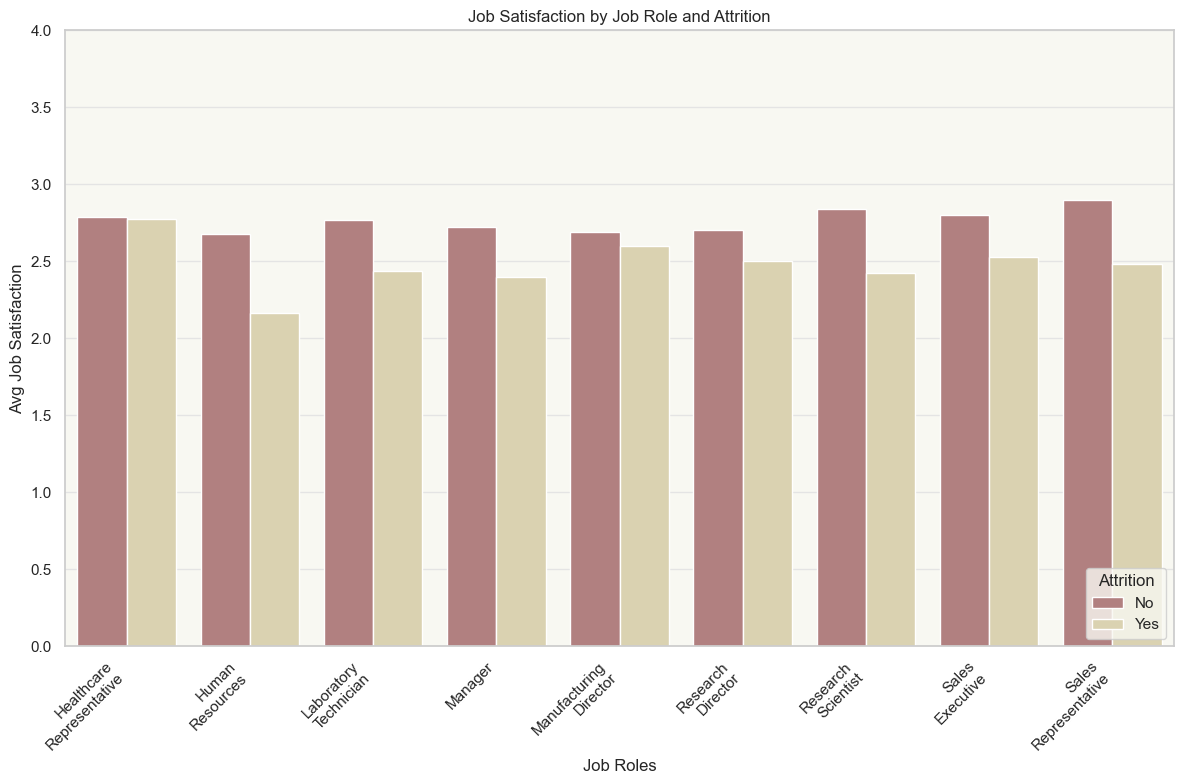

In [125]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#F8F8F2", "grid.color": "#E4E4E4"})

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Convert spaces to newline characters in JobRole
df['JobRole'] = df['JobRole'].str.replace(" ", "\n")

# Group by JobRole and Attrition, calculate average JobSatisfaction
grouped_data = df.groupby(['JobRole', 'Attrition'])['JobSatisfaction'].mean().reset_index()

# Plot the bar chart
sns.barplot(x='JobRole', y='JobSatisfaction', hue='Attrition', data=grouped_data, dodge=True, palette="pink", ax=ax)

# Set plot labels and titles
ax.set_title("Job Satisfaction by Job Role and Attrition")
ax.set_xlabel("Job Roles")
ax.set_ylabel("Avg Job Satisfaction")

# Set y-axis limits
ax.set_ylim(0, 4)

ax.legend(title="Attrition", loc="lower right")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- Attrition Rate is not high because of JobRole or Job Satisfaction in an organization, it seems no great change in the trend of the graph as some employees are highly satisfied
- May be because of MonthlyIncome

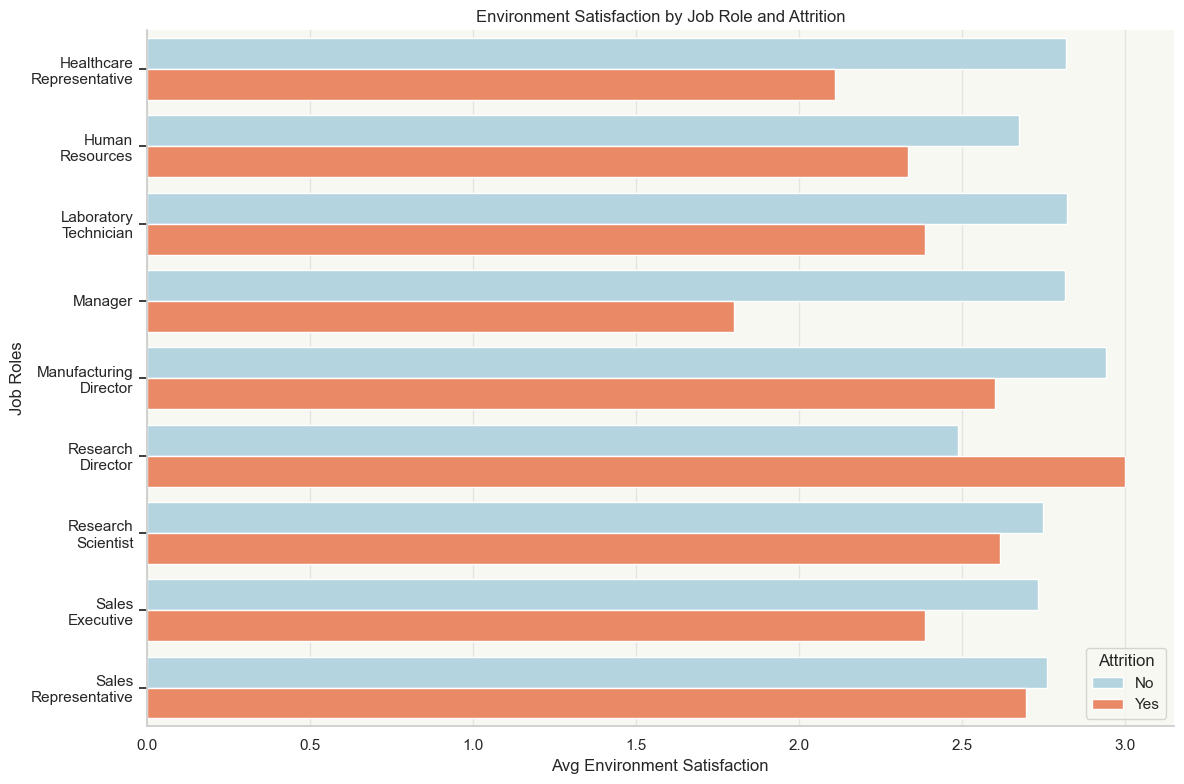

In [126]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#F8F8F2", "grid.color": "#E4E4E4"})

fig, ax = plt.subplots(figsize=(12, 8))

df['JobRole'] = df['JobRole'].str.replace(" ", "\n")

# Group by JobRole and Attrition, calculate average EnvironmentSatisfaction
grouped_data = df.groupby(['JobRole', 'Attrition'])['EnvironmentSatisfaction'].mean().reset_index()

# Define custom colors for each Attrition level
colors = {'Yes': 'coral', 'No': 'lightblue'}

# Plot the horizontal bar chart
sns.barplot(x='EnvironmentSatisfaction', y='JobRole', hue='Attrition', data=grouped_data, dodge=True, palette=colors, ax=ax)

# Set plot labels and titles
ax.set_title("Environment Satisfaction by Job Role and Attrition")
ax.set_xlabel("Avg Environment Satisfaction")
ax.set_ylabel("Job Roles")

# Display the legend
ax.legend(title="Attrition", loc="lower right")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.tick_left()

plt.tight_layout()
plt.show()


- From the graph Attrition rate is high when we see the trends of Environment satisfaction and Job role, most of the employees are highly not satisfied

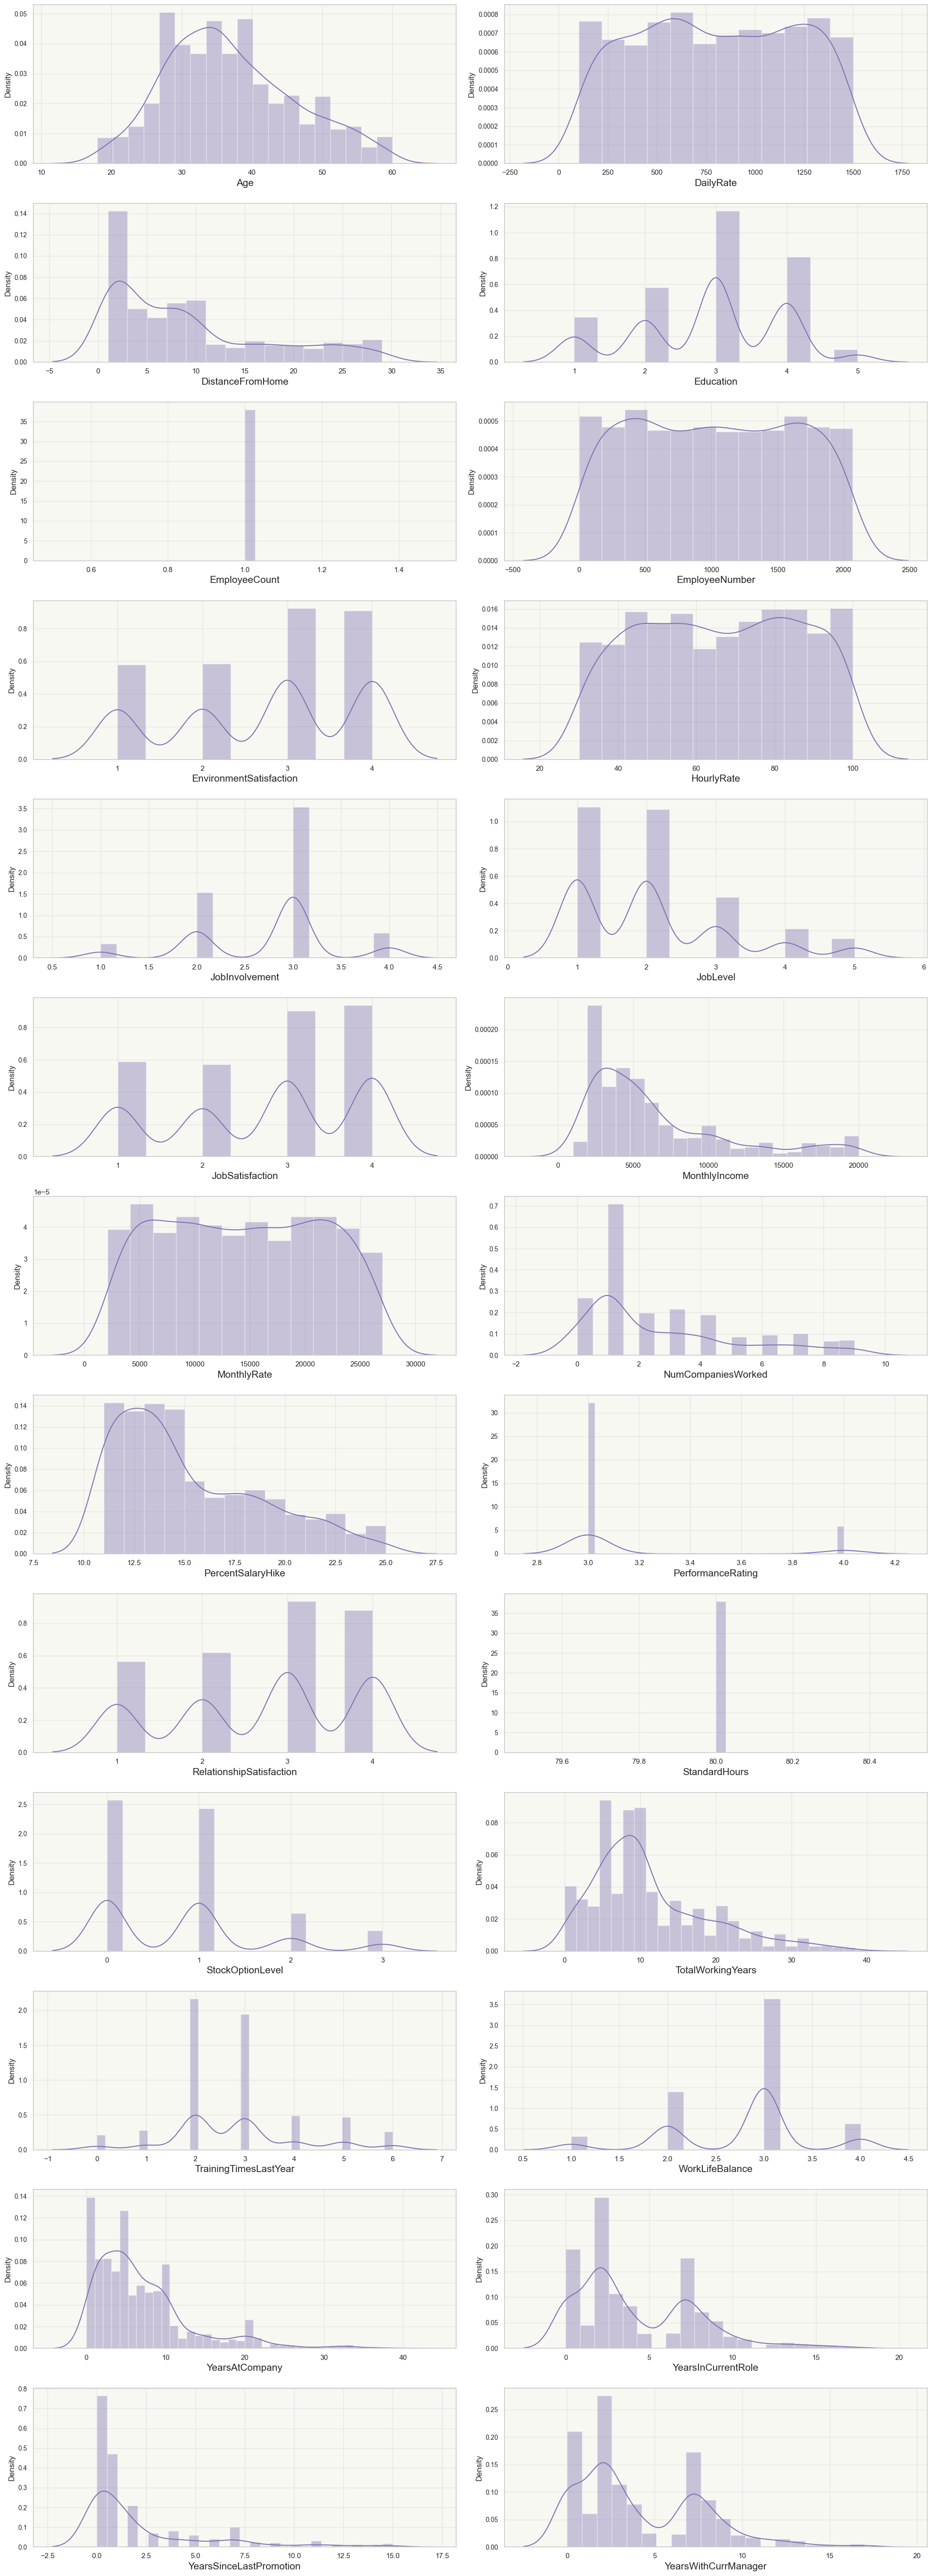

In [127]:
# Lets check the data has been distributed in numerical column

plt.figure(figsize=(20,55),facecolor='white')
plotnumber=1

for col in numerical_col:
    if plotnumber <=26:
        ax=plt.subplot(13,2,plotnumber)
        sns.distplot(df[col],color = 'm')
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()
plt.show()

- Age Distribution: The Age distribution exhibits a skewed, right-tailed pattern, indicating that most employees are in their younger years, with a few older employees. This pattern may be influenced by factors such as recruitment strategies or attrition rates.

- DailyRate Distribution: The DailyRate distribution appears to be skewed to the left, indicating that the majority of employees earn a lower daily rate. A peak at around the mean may suggest a normal distribution, although it is important to consider potential outliers.

- DistanceFromHome Distribution: The DistanceFromHome distribution exhibits a right-skewed pattern, with a peak near the mean. This may indicate that the majority of employees have a short commute, while some have longer commutes.

- Education Distribution: The Education distribution exhibits a similar pattern to the 'Age' distribution, with a majority of employees having lower education levels, and a few having higher education levels.

- EmployeeCount Distribution: The EmployeeCount distribution exhibits a bimodal pattern, with a peak near the lower end and another peak near the higher end. This may suggest that some departments have a larger number of employees, while others have fewer employees.

- EmployeeNumber Distribution: The EmployeeNumber distribution appears to be approximately normally distributed, with a peak near the mean.

- EnvironmentSatisfaction Distribution: The EnvironmentSatisfaction distribution exhibits a skewed pattern, with a majority of employees having a low satisfaction score.

- HourlyRate Distribution: The HourlyRate distribution appears to be skewed to the left, indicating that the majority of employees earn a lower hourly rate.

- JobInvolvement Distribution: The JobInvolvement distribution exhibits a bimodal pattern, with a peak near the lower end and another peak near the higher end. This may suggest that some employees are highly engaged in their job, while others are not.

- JobLevel Distribution: The JobLevel distribution appears to be approximately normally distributed, with a peak near the mean.

- JobSatisfaction Distribution: The JobSatisfaction distribution exhibits a bimodal pattern, with a peak near the lower end and another peak near the higher end. This may suggest that some employees are highly satisfied with their job, while others are not.

- MonthlyIncome Distribution: The MonthlyIncome distribution appears to be approximately normally distributed, with a peak near the mean.

- MonthlyRate' Distribution: The MonthlyRate distribution exhibits a right-skewed pattern, with a peak near the mean. This may indicate that the majority of employees earn a lower monthly rate, while some have higher monthly rates.

- NumCompaniesWorked Distribution: The NumCompaniesWorked distribution exhibits a skewed pattern, with a majority of employees having worked at fewer companies.

- PercentSalaryHike Distribution: The PercentSalaryHike distribution appears to be approximately normally distributed, with a peak near the mean.

- PerformanceRating Distribution: The PerformanceRating distribution exhibits a bimodal pattern, with a peak near the lower end and another peak near the higher end. This may suggest that some employees have a high performance rating, while others have a low performance rating.

- RelationshipSatisfaction Distribution: The RelationshipSatisfaction distribution exhibits a skewed pattern, with a majority of employees having low relationship satisfaction scores.

- StandardHours Distribution: The StandardHours distribution appears to be approximately normally -distributed, with a peak near the mean.

- StockOptionLevel Distribution: The StockOptionLevel distribution exhibits a bimodal pattern, with a peak near the lower end and another peak near the higher end. This may suggest that some employees have a low stock option level, while others have a high stock option level.

- TotalWorkingYears Distribution: The TotalWorkingYears distribution appears to be approximately normally distributed, with a peak near the mean.

- TrainingTimesLastYear Distribution: The TrainingTimesLastYear distribution exhibits a skewed pattern, with a majority of employees having received little or no training last year.

- WorkLifeBalance Distribution: The WorkLife Balance distribution appears to be approximately normally distributed, with a peak near the mean.

- YearsAtCompany Distribution: The YearsAtCompany distribution appears to be approximately normally distributed, with a peak near the mean.

- YearsInCurrentRole Distribution: The YearsInCurrent Role distribution appears to be approximately normally distributed, with a peak near the mean.

- YearsSinceLastPromotion Distribution: The YearsSinceLastPromotion distribution appears to be approximately normally distributed, with a peak near the mean.

- YearsWithCurrManager Distribution: The YearsWithCurrManager distribution appears to be approximately normally distributed, with a peak near the mean.

### Remove_skewness

In [128]:
from scipy.stats import boxcox
from scipy.stats import skew

def remove_skewness(df):
    # Get numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Exclude non-continuous columns
    continuous_cols = [col for col in numeric_cols if len(df[col].unique()) > 5]  # Adjust the threshold as needed
    
    # Exclude 'year' from continuous_cols
    continuous_cols = [col for col in continuous_cols if col != 'year']
    
    # Store skewness before transformation
    skewness_before = df[continuous_cols].apply(lambda x: skew(x))
    
    # Apply Box-Cox transformation
    df[continuous_cols] = df[continuous_cols].apply(lambda x: boxcox(x + 1)[0])  # Adding 1 to handle zero values
    
    # Store skewness after transformation
    skewness_after = df[continuous_cols].apply(lambda x: skew(x))
    
    # Display skewness before and after transformation
    skewness_summary = pd.DataFrame({'Skewness Before': skewness_before, 'Skewness After': skewness_after})
    
    return skewness_summary

skewness_summary = remove_skewness(df)

print("Skewness Summary:")
print(skewness_summary)


Skewness Summary:
                         Skewness Before  Skewness After
Age                             0.412864       -0.007595
DailyRate                      -0.003515       -0.195960
DistanceFromHome                0.957140       -0.007461
EmployeeNumber                  0.016557       -0.287731
HourlyRate                     -0.032278       -0.106352
MonthlyIncome                   1.368419        0.032797
MonthlyRate                     0.018559       -0.183900
NumCompaniesWorked              1.025423        0.014798
PercentSalaryHike               0.820290        0.116132
TotalWorkingYears               1.116032       -0.010643
TrainingTimesLastYear           0.552560        0.057998
YearsAtCompany                  1.762728       -0.008674
YearsInCurrentRole              0.916427       -0.060787
YearsSinceLastPromotion         1.982265        0.211912
YearsWithCurrManager            0.832600       -0.067496


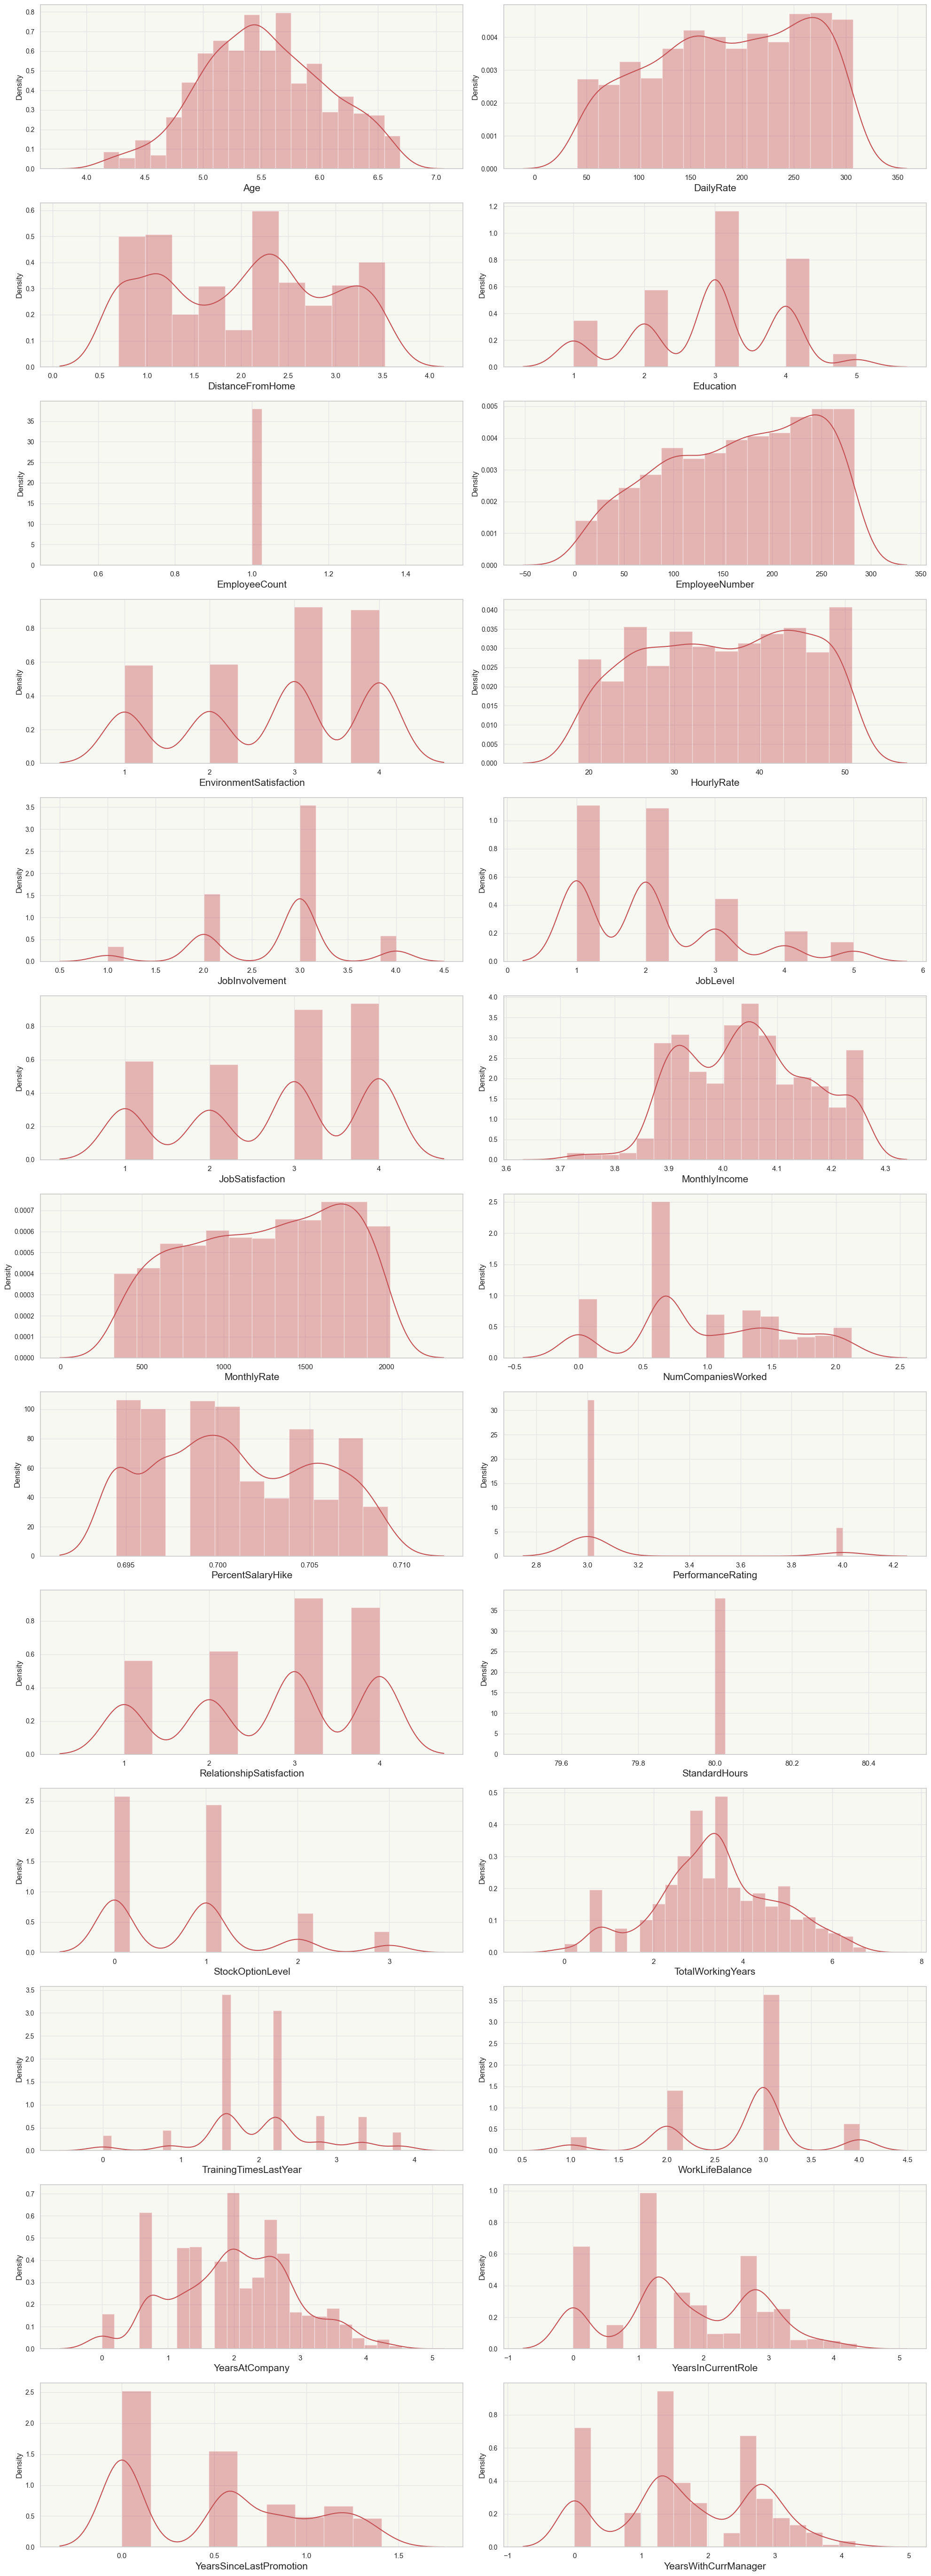

In [129]:
plt.figure(figsize=(20,55),facecolor='white')
plotnumber=1

for col in numerical_col:
    if plotnumber <=26:
        ax=plt.subplot(13,2,plotnumber)
        sns.distplot(df[col],color = 'r')
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()
plt.show()

### Checking for Outliers

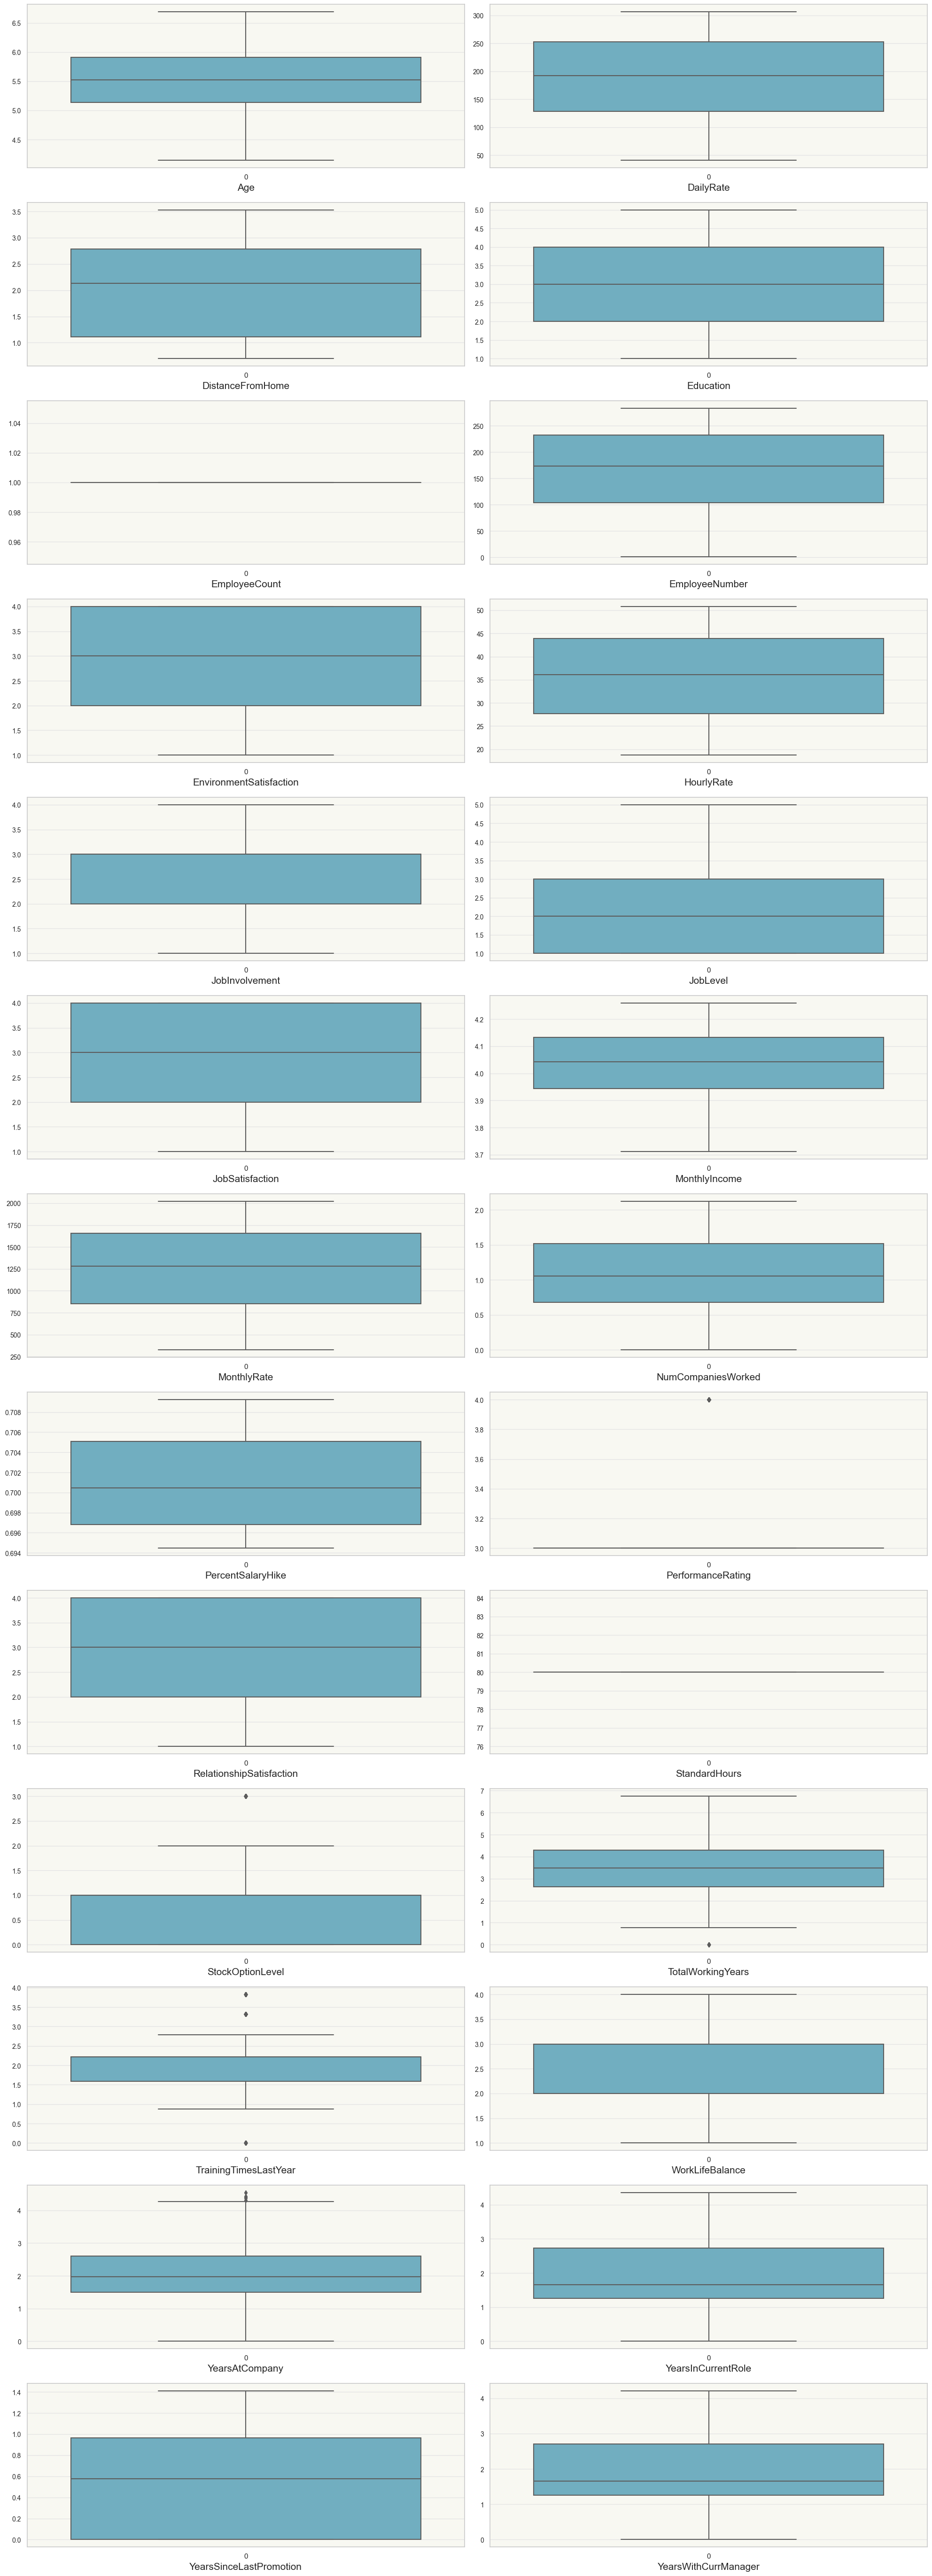

In [130]:
plt.figure(figsize=(20,55),facecolor='white')
plotnumber=1

for col in numerical_col:
    if plotnumber <=26:
        ax=plt.subplot(13,2,plotnumber)
        sns.boxplot(df[col],color = 'c')
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()
plt.show()

Analyze the box plots for the specified numerical columns:

Age: This plot shows the age distribution of employees. A shorter box and outliers may indicate a younger age distribution compared to the overall workforce.

DailyRate: This plot shows the daily rate distribution of employees. A longer box with a narrow range may indicate a uniform daily rate distribution, while outliers could suggest extreme daily rates.

DistanceFromHome: This plot shows the distance distribution of employees from their homes. A wider box and outliers may indicate a larger number of employees living far from their homes.

Education: This plot shows the number of employees with different education levels. A wide box and many outliers may indicate a diverse workforce with employees of varying educational backgrounds.

EmployeeCount: This plot shows the distribution of employees based on the number of employees in their organization. A box with a narrow range may indicate a specific type of organization is more common.

EmployeeNumber: This plot shows the employee number distribution. A wider box and outliers may indicate a large number of employees.

EnvironmentSatisfaction: This plot shows the distribution of employees' satisfaction with their work environment. A wide box and outliers may indicate a diverse range of employee satisfaction with the work environment.

HourlyRate: This plot shows the distribution of employees' hourly rates. A longer box with a narrow range may indicate a uniform hourly rate distribution, while outliers could suggest extreme hourly rates.

JobInvolvement: This plot shows the distribution of employees' job involvement levels. A wide box and outliers may indicate a diverse range of job involvement levels among employees.

JobLevel: This plot shows the distribution of employees based on their job level. A box with a narrow range may indicate a specific type of job level is more common.

JobSatisfaction: This plot shows the distribution of employees' job satisfaction levels. A wide box and outliers may indicate a diverse range of job satisfaction levels among employees.

MonthlyIncome: This plot shows the distribution of employees' monthly income. A longer box with a narrow range may indicate a uniform monthly income distribution, while outliers could be due to extreme monthly incomes.

MonthlyRate: This plot shows the distribution of employees' monthly rates. A longer box with a narrow range may indicate a uniform monthly rate distribution, while outliers could suggest extreme monthly rates.

NumCompaniesWorked: This plot shows the distribution of employees based on the number of companies they have worked for. A box with a narrow range may indicate a specific number of companies worked for is more common.

PercentSalaryHike: This plot shows the distribution of employees' percentage salary hikes. A wider box and outliers may indicate a larger number of employees with percentage salary hikes.

PerformanceRating: It indicates that the data points for that particular variable are clustered around a specific value. This suggests a relatively low variability or spread in the dataset for that particular feature

RelationshipSatisfaction: This plot shows the distribution of employees' relationship satisfaction levels. A wide box and outliers may indicate a diverse range of relationship satisfaction levels among employees.

StandardHours: A horizontal line in the box plot for "StandardHours" indicates that all data points have the same value for this variable, showing no variation in the standard number of working hours per week.

StockOptionLevel: This plot shows the distribution of employees based on their stock option level. A box with a narrow range may indicate a specific stock option level is more common.

TotalWorkingYears: This plot shows the distribution of employees' total working years. A wider box and outliers may indicate a diverse range of total working years among employees.

TrainingTimesLastYear: This plot shows the distribution of employees' training times last year. A wider box and outliers may indicate a large number of employees receiving training last year.

WorkLifeBalance: This plot shows the distribution of employees' work-life balance levels. A wide box and outliers may indicate a diverse range of work-life balance levels among employees.

YearsAtCompany: This plot shows the distribution of employees' years at their current company. A wide box and outliers may indicate a diverse range of years at the company among employees.

YearsInCurrentRole: This plot shows the distribution of employees' years in their current role. A wide box and outliers may indicate a diverse range of years in the current role among employees.

YearsSinceLastPromotion: This plot shows the clustered of employees at specific point with less spread of data years since their last promotion. The box being close to the x-axis suggests that the majority of employees experienced a similar duration since their last promotion. The presence of outliers indicates a few cases where employees have significantly different durations since their last promotion compared to the majority.

YearsWithCurrManager: This plot shows the distribution of employees' years with their current manager. A wide box and outliers may indicate a diverse range of years with the current manager among employees and it has outliers.



### Encoding

In [131]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df, columns):
    """
    Encode categorical columns in a DataFrame using LabelEncoder.

    Parameters:
    - df: DataFrame
    - columns: list of column names to be encoded

    Returns:
    - DataFrame: DataFrame with encoded columns
    - dict: Mapping of label encoders for each column
    """

    label_encoders = {}

    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return df, label_encoders

# Assuming df is your DataFrame, and you want to encode 'type' and 'region'
encoded_df, encoders = encode_categorical_columns(df, ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'])
encoders

{'Attrition': LabelEncoder(),
 'BusinessTravel': LabelEncoder(),
 'Department': LabelEncoder(),
 'EducationField': LabelEncoder(),
 'Gender': LabelEncoder(),
 'JobRole': LabelEncoder(),
 'MaritalStatus': LabelEncoder(),
 'Over18': LabelEncoder(),
 'OverTime': LabelEncoder()}

In [132]:
df = encoded_df
df

Age  Attrition  BusinessTravel   DailyRate  Department  \
0     5.805200          1               2  243.894616           2   
1     6.210510          0               1   87.208398           1   
2     5.579486          1               2  287.376666           1   
3     5.334419          0               1  290.337785           1   
4     4.920774          0               2  153.108179           1   
...        ...        ...             ...         ...         ...   
1465  5.520178          0               1  206.882277           1   
1466  5.694544          0               2  157.352708           1   
1467  4.920774          0               2   55.995480           1   
1468  6.210510          0               1  230.720449           2   
1469  5.397711          0               2  160.224286           1   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0             0.698341          2               1              1   
1             2.249981          1               1              1   
2             1.111697          2               4              1   
3             1.407173          4               1              1   
4             1.111697          1               3              1   
...                ...        ...             ...            ...   
1465          3.289209          2               3              1   
1466          1.987213          1               3              1   
1467          1.637624          3               1              1   
1468          1.111697          3               3              1   
1469          2.249981          3               3              1   

      EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
0           0.889472  ...                         1             80   
1           1.645618  ...                         4             80   
2           2.956131  ...                         2             80   
3           3.547949  ...                         3             80   
4           4.647750  ...                         4             80   
...              ...  ...                       ...            ...   
1465      282.543853  ...                         3             80   
1466      282.639147  ...                         1             80   
1467      282.829694  ...                         2             80   
1468      282.924946  ...                         4             80   
1469      283.210616  ...                         1             80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0           3.091801               0.000000   
1                    1           3.487098               2.215717   
2                    0           2.870452               2.215717   
3                    0           3.091801               2.215717   
4                    1           2.628635               2.215717   
...                ...                ...                    ...   
1465                 1           4.562442               2.215717   
1466                 1           3.296429               3.323597   
1467                 1           2.628635               0.000000   
1468                 0           4.562442               2.215717   
1469                 0           2.628635               2.215717   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                   1        2.158487            1.981581   
1                   3        2.726028            2.727508   
2                   3        0.000000            0.000000   
3                   3        2.470733            2.727508   
4                   3        1.164342            1.264375   
...               ...             ...                 ...   
1465                3        1.970991            1.264375   
1466                3        2.323369            2.727508   
1467                3        2.158487            1.264375   
1468                2        2.604104            2.506594   
1469                4        1.75310

- The ctegorical columns are encoded and getting ready for predicting the model

In [133]:
df.dtypes

Age                         float64
Attrition                     int32
BusinessTravel                int32
DailyRate                   float64
Department                    int32
DistanceFromHome            float64
Education                     int64
EducationField                int32
EmployeeCount                 int64
EmployeeNumber              float64
EnvironmentSatisfaction       int64
Gender                        int32
HourlyRate                  float64
JobInvolvement                int64
JobLevel                      int64
JobRole                       int32
JobSatisfaction               int64
MaritalStatus                 int32
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                        int32
OverTime                      int32
PercentSalaryHike           float64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

- We have only int and float dataytpes now

### Correlation map between target variable and independent variables

In [134]:
df.corr()

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.175766        0.020647   0.008698   
Attrition                -0.175766   1.000000        0.000074  -0.055923   
BusinessTravel            0.020647   0.000074        1.000000  -0.005556   
DailyRate                 0.008698  -0.055923       -0.005556   1.000000   
Department               -0.031494   0.063991       -0.009044   0.008348   
DistanceFromHome         -0.020217   0.078213       -0.008813  -0.006339   
Education                 0.224248  -0.031373        0.000757  -0.017049   
EducationField           -0.047321   0.026846        0.023724   0.037126   
EmployeeCount                  NaN        NaN             NaN        NaN   
EmployeeNumber           -0.004406  -0.008320       -0.016539  -0.053086   
EnvironmentSatisfaction   0.009420  -0.103369        0.004174   0.018489   
Gender                   -0.034937   0.029453       -0.032981  -0.009390   
HourlyRate                0.024993  -0.006390        0.026190   0.024923   
JobInvolvement            0.029366  -0.130016        0.039062   0.043278   
JobLevel                  0.508770  -0.169105        0.019311   0.002939   
JobRole                  -0.125189   0.067151        0.002724  -0.007065   
JobSatisfaction          -0.004758  -0.103481       -0.033962   0.033678   
MaritalStatus            -0.108161   0.162070        0.024001  -0.071117   
MonthlyIncome             0.498725  -0.205608        0.029114   0.013757   
MonthlyRate               0.020052   0.014483       -0.013581  -0.033383   
NumCompaniesWorked        0.330170   0.037554        0.026800   0.038445   
Over18                         NaN        NaN             NaN        NaN   
OverTime                  0.023349   0.246118        0.016543   0.008809   
PercentSalaryHike         0.003089  -0.022524       -0.033243   0.024132   
PerformanceRating         0.000396   0.002889       -0.026341   0.000446   
RelationshipSatisfaction  0.048846  -0.045872       -0.035986   0.009180   
StandardHours                  NaN        NaN             NaN        NaN   
StockOptionLevel          0.048552  -0.137145       -0.016727   0.043965   
TotalWorkingYears         0.688330  -0.214827        0.036349   0.020035   
TrainingTimesLastYear    -0.017274  -0.061284        0.016732   0.001518   
WorkLifeBalance          -0.019325  -0.063939       -0.011256  -0.038594   
YearsAtCompany            0.296016  -0.193406       -0.011451  -0.012831   
YearsInCurrentRole        0.214870  -0.182921       -0.021166   0.010738   
YearsSinceLastPromotion   0.181112  -0.054479       -0.029513  -0.038267   
YearsWithCurrManager      0.205007  -0.182957       -0.018747  -0.003915   

                          Department  DistanceFromHome  Education  \
Age                        -0.031494         -0.020217   0.224248   
Attrition                   0.063991          0.078213  -0.031373   
BusinessTravel             -0.009044         -0.008813   0.000757   
DailyRate                   0.008348         -0.006339  -0.017049   
Department                  1.000000          0.028139   0.007996   
DistanceFromHome            0.028139          1.000000   0.019562   
Education                   0.007996          0.019562   1.000000   
EducationField              0.013720          0.008463  -0.039592   
EmployeeCount                    NaN               NaN        NaN   
EmployeeNumber             -0.008167          0.033818   0.041757   
EnvironmentSatisfaction    -0.019395         -0.009526  -0.027128   
Gender                     -0.041583          0.007120  -0.016547   
HourlyRate                 -0.003944          0.018471   0.016880   
JobInvolvement             -0.024586          0.031039   0.042438   
JobLevel                    0.101963         -0.004026   0.101589   
JobRole                     0.662431          0.009334   0.004236   
JobSatisfaction             0.021001         -0.011458  -0.011296   
MaritalStatus               0.056073         -0.0234

In [135]:
df.drop(columns=['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

- We dropped two columns which has no correlation with target varaible

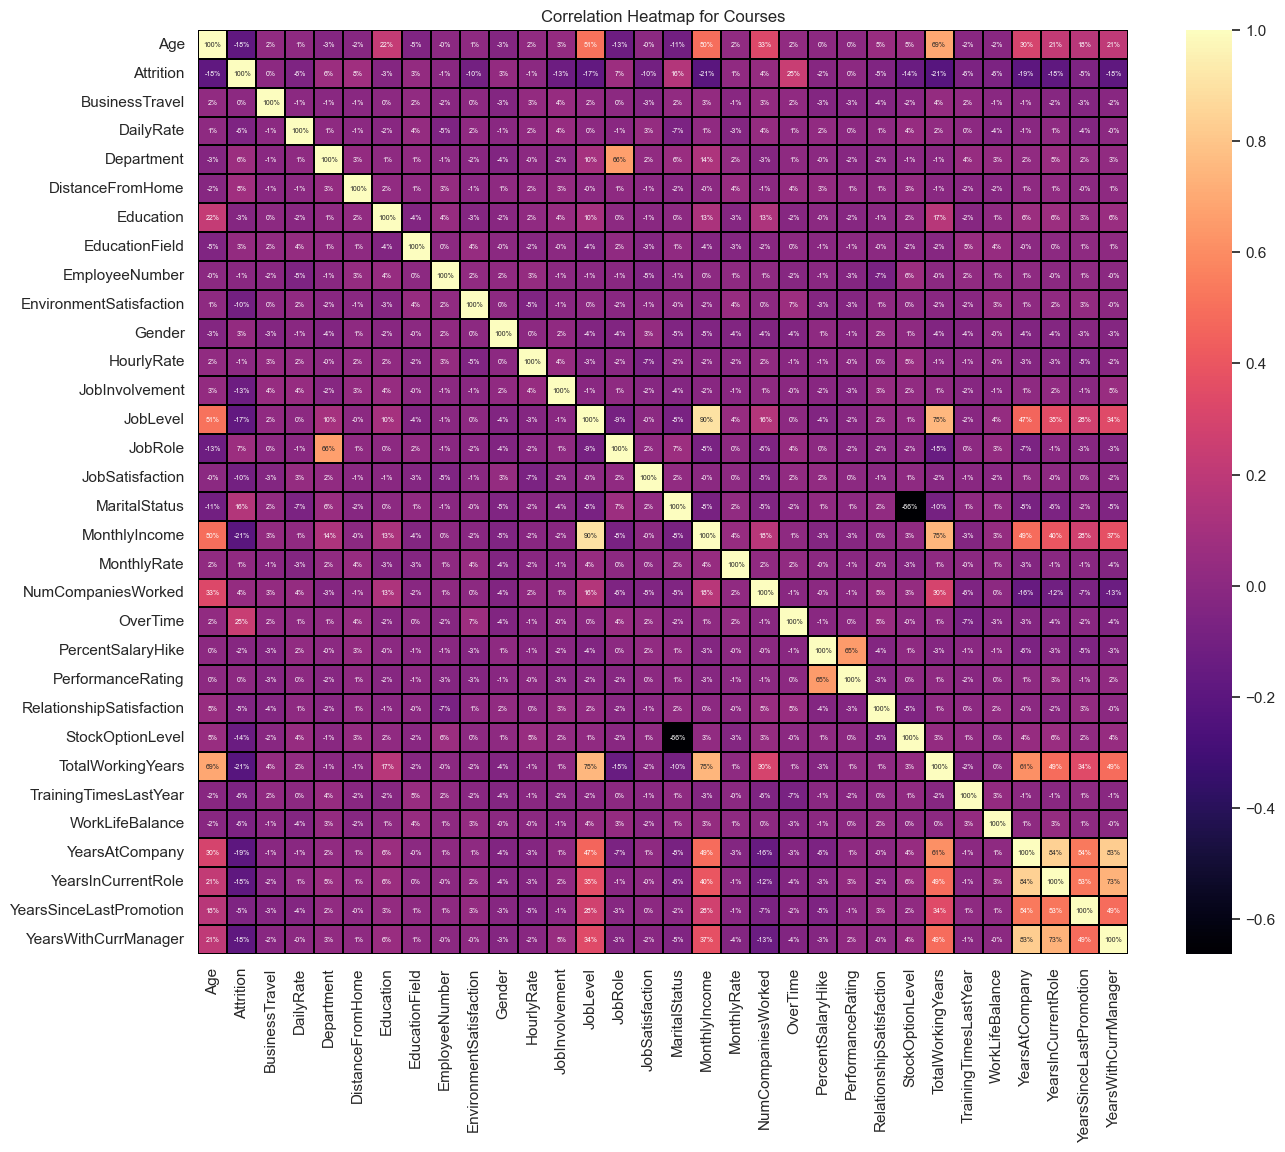

In [136]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), linewidths=0.1, fmt = '0.0%', linecolor ='black', annot = True,annot_kws={'size':5 }, cmap = 'magma')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap for Courses')
plt.show()

- Age and TotalWorkingYears: Strong positive correlation (0.69), indicating that as employees get older, their total working years tend to increase.
- JobLevel and MonthlyIncome:Strong positive correlation (0.75), suggesting that higher job levels are associated with higher monthly incomes.
- YearsAtCompany and YearsInCurrentRole:Strong positive correlation (0.84), indicating that the number of years an employee has spent at the company is closely related to the number of years they have spent in their current role.
- PerformanceRating and PercentSalaryHike:Very weak positive correlation (0.00), suggesting that there is little to no linear relationship between performance ratings and percentage salary hikes.
- Attrition and TotalWorkingYears:Moderate negative correlation (-0.21), indicating that employees with fewer total working years are slightly more likely to leave the company.
- JobSatisfaction and Attrition:Moderate negative correlation (-0.10), suggesting a slight tendency for employees with lower job satisfaction to be more likely to leave.
- YearsWithCurrManager and YearsSinceLastPromotion:Moderate positive correlation (0.49), indicating that the number of years an employee has been with their current manager is related to the time since their last promotion.

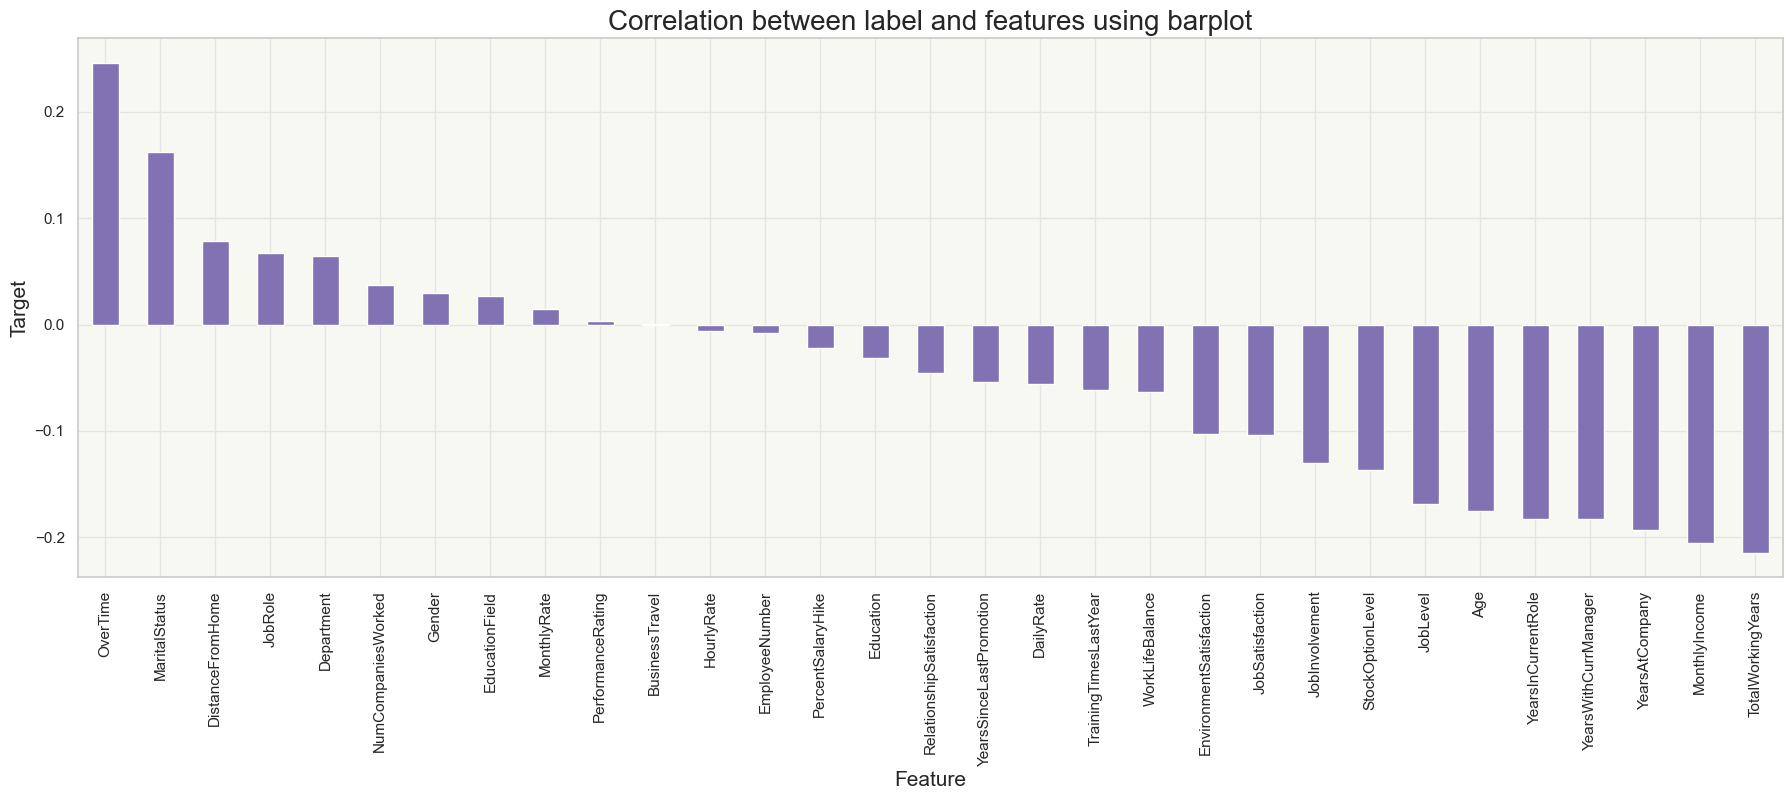

In [137]:
plt.figure(figsize = (22,7))
df.corr()['Attrition'].sort_values(ascending = False).drop(['Attrition']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target',fontsize = 15)
plt.title('Correlation between label and features using barplot', fontsize = 20)
plt.show()

- All the variables are positively and neagatively related but PerformanceRating, HourlyRate have weak relation
- BusinessTravel has 0.0 relation with Attrition

In [138]:
df.corr().Attrition.sort_values()

TotalWorkingYears          -0.214827
MonthlyIncome              -0.205608
YearsAtCompany             -0.193406
YearsWithCurrManager       -0.182957
YearsInCurrentRole         -0.182921
Age                        -0.175766
JobLevel                   -0.169105
StockOptionLevel           -0.137145
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.061284
DailyRate                  -0.055923
YearsSinceLastPromotion    -0.054479
RelationshipSatisfaction   -0.045872
Education                  -0.031373
PercentSalaryHike          -0.022524
EmployeeNumber             -0.008320
HourlyRate                 -0.006390
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.014483
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.037554
Department                  0.063991
J

Correlation coefficients between various features and the target variable Attrition key observations based on the correlation coefficients:

- Negative Correlations: Employees with higher values in TotalWorkingYears, MonthlyIncome, YearsAtCompany, YearsWithCurrManager, YearsInCurrentRole, and Age are less likely to experience attrition. This makes intuitive sense as more experienced and older employees may be more stable in their positions.
- Job-Related Factors: Negative correlations with JobLevel, StockOptionLevel, JobInvolvement, and JobSatisfaction suggest that employees with higher job levels, stock options, job involvement, and job satisfaction are less likely to leave.
- Work-Life Balance:Negative correlation with WorkLifeBalance indicates that employees with better work-life balance are less likely to experience attrition.
- Training and Development:Negative correlation with TrainingTimesLastYear suggests that employees who undergo more training are less likely to leave.
- Personal Factors:Negative correlations with DailyRate, YearsSinceLastPromotion, RelationshipSatisfaction, and Education suggest that lower daily rates, recent promotions, higher relationship satisfaction, and higher education levels are associated with lower attrition.
- Positive Correlations:Positive correlations with MaritalStatus, OverTime, and Department suggest that being single, working overtime, and being in certain departments might be associated with a higher likelihood of attrition.
- No Strong Correlation: Features like BusinessTravel, PerformanceRating, EmployeeNumber, HourlyRate, and PercentSalaryHike show weak correlations with attrition.

### Feature Selection

In [139]:
from sklearn.feature_selection import SelectPercentile, chi2

In [140]:
# Instantiate SelectPercentile and fit(feature, label)

x=df.drop(['Attrition'],axis=1)
y=df.Attrition

SPercentile = SelectPercentile(score_func=chi2, percentile=80)
Spercentile = SPercentile.fit(x,y)
Spercentile

SelectPercentile(percentile=80,
                 score_func=<function chi2 at 0x00000299B9310430>)

In [141]:
# Seperate the features to check p-values

cols = SPercentile.get_support(indices = True)  # to return index numbers instead of boolean
print('Features Index :', cols)

features = x.columns[cols]
print('Feature Index: ', cols)

Features Index : [ 0  2  3  4  6  7  8 11 12 13 14 15 17 18 19 22 23 24 25 26 27 28 29 30]
Feature Index:  [ 0  2  3  4  6  7  8 11 12 13 14 15 17 18 19 22 23 24 25 26 27 28 29 30]


In [142]:
df_scores = pd.DataFrame({'features': x.columns , 'Chi2Score':SPercentile.scores_, 'pValue': SPercentile.pvalues_})
df_scores.sort_values(by = 'Chi2Score',ascending = False)

features   Chi2Score        pValue
2                  DailyRate  137.607133  8.881977e-32
19                  OverTime   63.845067  1.345990e-15
17               MonthlyRate   55.150677  1.116352e-13
24         TotalWorkingYears   35.216468  2.950183e-09
30      YearsWithCurrManager   35.009275  3.281385e-09
28        YearsInCurrentRole   33.880565  5.860116e-09
23          StockOptionLevel   25.268826  4.987041e-07
12                  JobLevel   24.939242  5.916575e-07
27            YearsAtCompany   22.468054  2.136677e-06
15             MaritalStatus   18.745657  1.493631e-05
13                   JobRole    9.004448  2.693233e-03
14           JobSatisfaction    7.011947  8.096760e-03
8    EnvironmentSatisfaction    6.890594  8.665045e-03
11            JobInvolvement    4.605616  3.186740e-02
7             EmployeeNumber    3.558982  5.922404e-02
4           DistanceFromHome    3.528208  6.033297e-02
0                        Age    2.373566  1.234049e-01
29   YearsSinceLastPromotion    1.921340  1.657090e-01
25     TrainingTimesLastYear    1.696132  1.927947e-01
22  RelationshipSatisfaction    1.332333  2.483906e-01
3                 Department    1.329297  2.489303e-01
26           WorkLifeBalance    1.085543  2.974609e-01
6             EducationField    0.834912  3.608561e-01
18        NumCompaniesWorked    0.769934  3.802375e-01
5                  Education    0.520642  4.705679e-01
9                     Gender    0.510087  4.751014e-01
16             MonthlyIncome    0.204529  6.510897e-01
10                HourlyRate    0.143808  7.045247e-01
21         PerformanceRating    0.000506  9.820524e-01
20         PercentSalaryHike    0.000020  9.963965e-01
1             BusinessTravel    0.000002  9.988158e-01

A chi-squared test for independence to assess the relationship between categorical features and the target variable Attrition
- Significant Features: DailyRate, OverTime, MonthlyRate, TotalWorkingYears, YearsWithCurrManager, and YearsInCurrentRole have highly significant p-values (p < 0.05), indicating a strong association with Attrition.

- Moderately Significant Features:StockOptionLevel, JobLevel, and YearsAtCompany also show significant p-values (0.01 < p < 0.05), suggesting a moderate association with Attrition.

- Less Significant Features: MaritalStatus, JobRole, JobSatisfaction, EnvironmentSatisfaction, and JobInvolvement have p-values greater than 0.05 but less than 0.1, indicating a weaker but potentially relevant association.
- Non-Significant Features: Several features, including EducationField, NumCompaniesWorked, Education, Gender, MonthlyIncome, HourlyRate, PerformanceRating, PercentSalaryHike, BusinessTravel, and others, have p-values greater than 0.1, suggesting a lack of significant association with Attrition.


The interpretation of p-values 0.05. A lower p-value indicates stronger evidence against the null hypothesis

In [143]:
# Create subset pf selected features

x= df[features]

y= df.Attrition

In [144]:
x

Age   DailyRate  Department  DistanceFromHome  EducationField  \
0     5.805200  243.894616           2          0.698341               1   
1     6.210510   87.208398           1          2.249981               1   
2     5.579486  287.376666           1          1.111697               4   
3     5.334419  290.337785           1          1.407173               1   
4     4.920774  153.108179           1          1.111697               3   
...        ...         ...         ...               ...             ...   
1465  5.520178  206.882277           1          3.289209               3   
1466  5.694544  157.352708           1          1.987213               3   
1467  4.920774   55.995480           1          1.637624               1   
1468  6.210510  230.720449           2          1.111697               3   
1469  5.397711  160.224286           1          2.249981               3   

      EmployeeNumber  EnvironmentSatisfaction  JobInvolvement  JobLevel  \
0           0.889472                        2               3         2   
1           1.645618                        3               2         2   
2           2.956131                        4               2         1   
3           3.547949                        4               3         1   
4           4.647750                        1               3         1   
...              ...                      ...             ...       ...   
1465      282.543853                        3               4         2   
1466      282.639147                        4               2         3   
1467      282.829694                        2               4         2   
1468      282.924946                        4               2         2   
1469      283.210616                        2               4         2   

      JobRole  ...  OverTime  RelationshipSatisfaction  StockOptionLevel  \
0           7  ...         1                         1                 0   
1           6  ...         0                         4                 1   
2           2  ...         1                         2                 0   
3           6  ...         1                         3                 0   
4           2  ...         0                         4                 1   
...       ...  ...       ...                       ...               ...   
1465        2  ...         0                         3                 1   
1466        0  ...         0                         1                 1   
1467        4  ...         1                         2                 1   
1468        7  ...         0                         4                 0   
1469        2  ...         0                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0              3.091801               0.000000                1   
1              3.487098               2.215717                3   
2              2.870452               2.215717                3   
3              3.091801               2.215717                3   
4              2.628635               2.215717                3   
...                 ...                    ...              ...   
1465           4.562442               2.215717                3   
1466           3.296429               3.323597                3   
1467           2.628635               0.000000                3   
1468           4.562442               2.215717                2   
1469           2.628635               2.215717                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0           2.158487            1.981581                 0.000000   
1           2.726028            2.727508                 0.574592   
2           0.000000            0.000000                 0.000000   
3           2.470733            2.727508                 0.964529   
4           1.164342            1.264375                 0.820785   
...              ...                 ...                      ...

In [145]:
y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

- Majority of instances belonging to class 0 (no attrition, 1233 instances) and a minority in class 1 (attrition, 237 instances), indicating imbalanced dataset

### Resampling the data

In [146]:
import imblearn
from imblearn.over_sampling import SMOTE 
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

In [147]:
y1.value_counts()

Attrition
1    1233
0    1233
Name: count, dtype: int64

In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

### Standardization and Feature scaling

In [149]:
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x

Age  DailyRate  Department  DistanceFromHome  EducationField  \
0     0.701425   0.836471    1.575816         -1.685067       -0.889138   
1     1.457136  -1.318510   -0.368137          0.167254       -0.889138   
2     0.280574   1.434500   -0.368137         -1.191609        1.500198   
3    -0.176360   1.475226   -0.368137         -0.838876       -0.889138   
4    -0.947614  -0.412159   -0.368137         -1.191609        0.703753   
...        ...        ...         ...               ...             ...   
2461 -0.285826   0.271100   -0.368137         -0.898193        1.500198   
2462 -0.277430  -0.467883   -0.368137          0.346884        0.703753   
2463  0.484075   0.261403   -2.312090         -0.099169       -1.685583   
2464 -1.585352  -1.668366   -0.368137          0.311340       -0.889138   
2465  0.482667   1.650506    1.575816          1.260230       -0.889138   

      EmployeeNumber  EnvironmentSatisfaction  JobInvolvement  JobLevel  \
0          -2.273417                -0.435509        0.658661  0.231563   
1          -2.262959                 0.504094       -0.684811  0.231563   
2          -2.244833                 1.443696       -0.684811 -0.756386   
3          -2.236647                 1.443696        0.658661 -0.756386   
4          -2.221435                -1.375112        0.658661 -0.756386   
...              ...                      ...             ...       ...   
2461       -2.030518                 0.504094        0.658661 -0.756386   
2462        0.848349                -1.375112       -0.684811 -0.756386   
2463       -1.693007                -0.435509       -0.684811 -0.756386   
2464       -1.161404                -0.435509        0.658661 -0.756386   
2465        0.011357                -0.435509        0.658661  1.219513   

       JobRole  ...  OverTime  RelationshipSatisfaction  StockOptionLevel  \
0     1.071688  ...  1.589936                 -1.426353         -0.742599   
1     0.641127  ... -0.628956                  1.404162          0.528219   
2    -1.081117  ...  1.589936                 -0.482848         -0.742599   
3     0.641127  ...  1.589936                  0.460657         -0.742599   
4    -1.081117  ... -0.628956                  1.404162          0.528219   
...        ...  ...       ...                       ...               ...   
2461  1.071688  ... -0.628956                 -0.482848          0.528219   
2462  0.641127  ... -0.628956                  0.460657         -0.742599   
2463 -1.511678  ... -0.628956                  1.404162         -0.742599   
2464 -0.219995  ... -0.628956                  0.460657          0.528219   
2465  1.071688  ... -0.628956                  0.460657         -0.742599   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0             -0.027384              -2.663305        -2.188553   
1              0.272567               0.298636         0.544091   
2             -0.195345               0.298636         0.544091   
3             -0.027384               0.298636         0.544091   
4             -0.378836               0.298636         0.544091   
...                 ...                    ...              ...   
2461           0.589599               1.204543         0.544091   
2462           0.782572              -0.544648        -0.822231   
2463           0.012722               0.171575         0.544091   
2464          -1.128216              -0.147793        -0.822231   
2465           1.381069              -0.481095        -0.822231   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0           0.343011            0.402629                -1.111189   
1           0.985091            1.117744                 0.161201   
2          -2.098965           -1.497099                -1.111189   
3           0.696266            1.117744                 1.024688   
4          -0.781702           -0.284951                 0.706377   
...              ...                 ...                      ...

In [150]:
y=y1

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] =[variance_inflation_factor(x,i) for i in range (x.shape[1])]
vif['Features'] =x.columns

vif

vif values                  Features
0     2.181628                       Age
1     1.042419                 DailyRate
2     1.880126                Department
3     1.022611          DistanceFromHome
4     1.047220            EducationField
5     1.037098            EmployeeNumber
6     1.074452   EnvironmentSatisfaction
7     1.096802            JobInvolvement
8     2.393069                  JobLevel
9     1.807824                   JobRole
10    1.064749           JobSatisfaction
11    1.533809             MaritalStatus
12    1.051686               MonthlyRate
13    1.417449        NumCompaniesWorked
14    1.029586                  OverTime
15    1.062291  RelationshipSatisfaction
16    1.572211          StockOptionLevel
17    4.989825         TotalWorkingYears
18    1.036381     TrainingTimesLastYear
19    1.077614           WorkLifeBalance
20    7.598366            YearsAtCompany
21    4.196460        YearsInCurrentRole
22    1.590228   YearsSinceLastPromotion
23    3.796184      YearsWithCurrManager

- There is no multicollinearity issue as the values are below 5

In [152]:
maxAccu = 0
maxRs = 0                      
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.20, random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is ', maxAccu, 'at random_state', maxRS)

Best accuracy is  0.9352226720647774 at random_state 2


### Splitting the data into x and y train

In [153]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.20, random_state=maxRS)

In [154]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [155]:
# Checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()                   
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9190283400809717
[[220  16]
 [ 24 234]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       236
           1       0.94      0.91      0.92       258

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



In [156]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.840080971659919
[[190  46]
 [ 33 225]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       236
           1       0.83      0.87      0.85       258

    accuracy                           0.84       494
   macro avg       0.84      0.84      0.84       494
weighted avg       0.84      0.84      0.84       494



In [157]:
# Checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9129554655870445
[[220  16]
 [ 27 231]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       236
           1       0.94      0.90      0.91       258

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494



In [158]:
# Checking accuracy for AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC .fit(x_train,y_train)
predABC  = ABC .predict(x_test)
print(accuracy_score(y_test,predABC ))
print(confusion_matrix(y_test,predABC ))
print(classification_report(y_test,predABC ))

0.9048582995951417
[[211  25]
 [ 22 236]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       236
           1       0.90      0.91      0.91       258

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



In [159]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8906882591093117
[[221  15]
 [ 39 219]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       236
           1       0.94      0.85      0.89       258

    accuracy                           0.89       494
   macro avg       0.89      0.89      0.89       494
weighted avg       0.89      0.89      0.89       494



In [160]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9048582995951417
[[208  28]
 [ 19 239]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       236
           1       0.90      0.93      0.91       258

    accuracy                           0.90       494
   macro avg       0.91      0.90      0.90       494
weighted avg       0.91      0.90      0.90       494



In [161]:
# Checking accuracy for ExtraTreesClassifier
ET = BaggingClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8562753036437247
[[210  26]
 [ 45 213]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       236
           1       0.89      0.83      0.86       258

    accuracy                           0.86       494
   macro avg       0.86      0.86      0.86       494
weighted avg       0.86      0.86      0.86       494



In [162]:
from sklearn.model_selection import cross_val_score

In [163]:
# Checking cv score forRandomForestClassifier
score1 = cross_val_score(RFC,x,y)
print(score1)
print(score1.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predRFC)-score1.mean())

[0.57489879 0.93914807 0.93103448 0.92697769 0.54969574]
0.7843509538395842
Difference between Accuracy score and cross validation is:  0.13467738624138748


In [164]:
# Checking cv score for LogisticRegression
score2 = cross_val_score(LR,x,y)
print(score2)
print(score2.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predLR)-score2.mean())

[0.61538462 0.85192698 0.82352941 0.83772819 0.79513185]
0.7847402090809799
Difference between Accuracy score and cross validation is:  0.05534076257893916


In [165]:
# Checking cv score for GradientBoosingClassifier
score4 = cross_val_score(GB,x,y)
print(score4)
print(score4.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predGB)-score4.mean())

[0.4048583  0.81947262 0.73630832 0.76673428 0.49290061]
0.6440548242192312
Difference between Accuracy score and cross validation is:  0.26890064136781333


In [166]:
# Checking cv score for Support Vector Machine Classifier
score7 = cross_val_score(svc,x,y)
print(score7)
print(score7.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predsvc)-score7.mean())

[0.65587045 0.89858012 0.89249493 0.89858012 0.88235294]
0.8455757117868785
Difference between Accuracy score and cross validation is:  0.05928258780826323


In [167]:
# Checking cv score for AdaBoostClassifier
score5 = cross_val_score(ABC,x,y)
print(score5)
print(score5.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predABC)-score5.mean())

[0.22469636 0.77687627 0.74036511 0.80324544 0.47870183]
0.6047769994497869
Difference between Accuracy score and cross validation is:  0.30008130014535483


In [168]:
# Checking cv for score BaggingClassifier
score6 = cross_val_score(BC,x,y)
print(score6)
print(score6.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predBC)-score6.mean())

[0.29959514 0.89249493 0.86004057 0.87018256 0.4969574 ]
0.6838541196179715
Difference between Accuracy score and cross validation is:  0.20683413949134022


In [169]:
# Checking cv score for ExtraTreesClassifier
score3 = cross_val_score(ET,x,y)
print(score3)
print(score3.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predET)-score3.mean())

[0.24898785 0.89858012 0.87018256 0.86612576 0.49087221]
0.6749497006676466
Difference between Accuracy score and cross validation is:  0.18132560297607814


### Compare accuracy of models

In [170]:
pd.DataFrame([['Support Vector Machine',score7.mean()*100],['Extra Tree Classifier',score3.mean()*100],['Gradient Boost Classifier',score4.mean()*100],
              ['LogisticRegression',score2.mean()*100],['Random Forest Classifier',score1.mean()*100],['KNeighborsClassifier',score3.mean()*100],['AdaBoostClassifier',score5.mean()*100],
              ['Bagging Classifier',score6.mean()*100]],columns=['Models','Accuracy'])

Models   Accuracy
0     Support Vector Machine  84.557571
1      Extra Tree Classifier  67.494970
2  Gradient Boost Classifier  64.405482
3         LogisticRegression  78.474021
4   Random Forest Classifier  78.435095
5       KNeighborsClassifier  67.494970
6         AdaBoostClassifier  60.477700
7         Bagging Classifier  68.385412

**The model choosed is Support Vector Machine Classifier**
- cross validation sccore is :84.5
- Difference between Accuracy score and cross validation is:  0.059
- accuracy_score :90.4%

In [171]:
parameters = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf', 'poly'], 
    'gamma': [0.001, 0.01, 0.1, 1],  
    'degree': [2, 3, 4],  
    'coef0': [0.0, 1.0, 2.0]  
}


In [172]:
from sklearn.model_selection import GridSearchCV

In [173]:
GCV = GridSearchCV(SVC(max_iter=1000),parameters,cv=5)

In [174]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100], 'coef0': [0.0, 1.0, 2.0],
                         'degree': [2, 3, 4], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [175]:
GCV.best_params_   

{'C': 10, 'coef0': 0.0, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}

In [176]:
Final_model = GCV.best_estimator_

In [177]:
Final_model

SVC(C=10, degree=2, gamma=0.1, max_iter=1000)

In [178]:
Final_model = SVC(C= 10, gamma= 0.1, kernel= 'rbf',coef0 = 0.0, degree = 2)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 94.94%


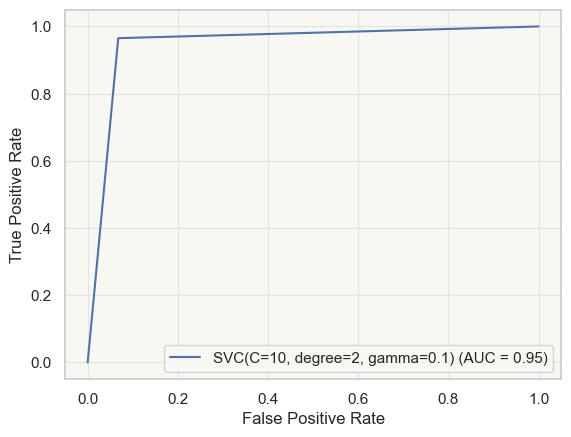

In [187]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr, roc_auc=roc_auc,estimator_name = Final_model)
display.plot()
plt.show()

- An AUC of 0.95 signifies that your model has excellent discriminatory ability, accurately distinguishing between positive and negative instances, with a strong overall performance close to the ideal value of 1.

In [180]:
import pickle
filename = 'IBM_HR_Employee_Attrition_Rate_Analytics.pkl'
pickle.dump(Final_model,open(filename,'wb')) 

In [181]:
import pickle
loaded_model = pickle.load(open('IBM_HR_Employee_Attrition_Rate_Analytics.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

94.93927125506073


In [182]:
svc=np.array(y_test)
df = pd.DataFrame()
df['Predicted'] =prediction
df['Original'] = svc
df

Predicted  Original
0            0         0
1            1         1
2            0         0
3            0         1
4            0         0
..         ...       ...
489          0         0
490          0         0
491          1         1
492          1         1
493          1         1

[494 rows x 2 columns]